# Introduction

Source data : https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data

References : https://www.kaggle.com/code/moatazbellahahmed/stores-sales-prediction-eda 

## Objectives

1. Standard Data Explarotary
  * Statistical Summary
  * Univariate Analysis
  * Multivariate Analysis

2.  Deep-dive Data Exploratory
  * How the growth of sales, product available on promotion and oil price?
  * How the correlation between sales, onpromotion and oilprice in monthly basis?
  * How the day type affect sales ?
  * Who is the top 10 customer who bought product the largest ?
  * How the growth of the sales in each city ?

3. Model of Forecasting Sales

4. Business Solutions

In [ ]:
# Mounting google drive ke google colabs #
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Portfolio/store-sales-time-series-forecasting

/content/drive/MyDrive/Portfolio/store-sales-time-series-forecasting


# Import Libraries

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Data Preparation

## Import Datasets

In [ ]:
event = pd.read_csv('holidays_events.csv')
oil = pd.read_csv('oil.csv')
submission = pd.read_csv('sample_submission.csv')
stores = pd.read_csv('stores.csv')
trans = pd.read_csv('transactions.csv')
train_data = pd.read_csv('train.csv')
test_prod = pd.read_csv('test.csv')

## Load and Data Description

#### Event Data

In [ ]:
#Lookup event data
event.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
#Dheck detail event data
event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


#### Oil Price Data

In [ ]:
#Lookup oil data
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
#Dheck detail oil data
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


#### Submission Data

In [ ]:
#lookup submission data
submission.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [ ]:
#Check detail submisson data
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28512 non-null  int64  
 1   sales   28512 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 445.6 KB


#### Stores

In [ ]:
#lookup stores data
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
#Check detail stores data
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28512 non-null  int64  
 1   sales   28512 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 445.6 KB


#### Transaction

In [ ]:
#lookup transaction data
trans.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [ ]:
#Check detail transaction data
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


#### Train Data

In [ ]:
#lookup train data
train_data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
#Check detail transaction data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


#### Test Production Data

In [ ]:
#lookup testdata
test_prod.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [ ]:
#Check detail transaction data
test_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


## Data Cleansing

### Handling Missing Value

#### Event Data

In [ ]:
# Finding missing value null in event data #
event.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

There's no missing value in event data which is good!

#### Oil Price Data

In [ ]:
# Finding missing value null in oil data #
oil.isna().sum()

date           0
dcoilwtico    43
dtype: int64

Because of this is the historical price of oil, it would be better if null values same as the mean of the the oil price, not delete the data. Because the Ecuador is an oil-dependent country.

Notes :The null values will be handled after merge data

#### Submission Data

In [ ]:
# Finding missing value null in submission data #
submission.isna().sum()

id       0
sales    0
dtype: int64

There's no missing value in submission data which is good!

#### Transaction Data

In [ ]:
# Finding missing value null in transaction data #
trans.isna().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

There's no missing value in transaction data which is good!

#### Train Data

In [ ]:
# Finding missing value null in transaction data #
train_data.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

There's no missing value in train data which is good!

### Handling Duplicated Value

#### Event Data

In [ ]:
# Check data duplicate
event.duplicated().sum()

0

There's no duplicated data, which is good.

#### Oil Price Data

In [ ]:
# Check data duplicate
oil.duplicated().sum()

0

There's no duplicated data, which is good.

#### Submission Data

In [ ]:
# Check data duplicate
submission.duplicated().sum()

0

There's no duplicated data, which is good.

#### Transaction Data

In [ ]:
# Check data duplicate
submission.duplicated().sum()

0

There's no duplicated data, which is good.

#### Train Data

In [ ]:
# Check data duplicate
train_data.duplicated().sum()

0

There's no duplicated data, which is good.

## Data Manipulation

### Lookup Date Range of All Data

In [ ]:
# Lookup the range date of transaction #
trans["date"].sort_values(ascending=False)

83487    2017-08-15
83446    2017-08-15
83458    2017-08-15
83457    2017-08-15
83456    2017-08-15
            ...    
30       2013-01-02
29       2013-01-02
28       2013-01-02
27       2013-01-02
0        2013-01-01
Name: date, Length: 83488, dtype: object

In [ ]:
# Lookup the range date of event #
event["date"].sort_values(ascending=False)

349    2017-12-26
348    2017-12-25
347    2017-12-24
346    2017-12-23
345    2017-12-22
          ...    
4      2012-04-21
3      2012-04-14
2      2012-04-12
1      2012-04-01
0      2012-03-02
Name: date, Length: 350, dtype: object

In [ ]:
# Lookup the range date of oil price #
oil["date"].sort_values(ascending=False)

1217    2017-08-31
1216    2017-08-30
1215    2017-08-29
1214    2017-08-28
1213    2017-08-25
           ...    
4       2013-01-07
3       2013-01-04
2       2013-01-03
1       2013-01-02
0       2013-01-01
Name: date, Length: 1218, dtype: object

In [ ]:
# Lookup the range date of train data #
train_data["date"].sort_values(ascending=False)

3000887    2017-08-15
2999703    2017-08-15
2999692    2017-08-15
2999693    2017-08-15
2999694    2017-08-15
              ...    
1192       2013-01-01
1193       2013-01-01
1194       2013-01-01
1195       2013-01-01
0          2013-01-01
Name: date, Length: 3000888, dtype: object

In [ ]:
# Lookup the range date of transaction in store transaction #
test_prod["date"].sort_values(ascending=False)

28511    2017-08-31
27327    2017-08-31
27316    2017-08-31
27317    2017-08-31
27318    2017-08-31
            ...    
1192     2017-08-16
1193     2017-08-16
1194     2017-08-16
1195     2017-08-16
0        2017-08-16
Name: date, Length: 28512, dtype: object

From join data we know that : 
* transaction start from Jan 1, 2013 till Aug 15, 2017.
* Event data start from Mar 2, 2012 till Dec 26, 2017
* oil price data start form Jan 1, 2013 till Aug 31, 2017
* train data start from Jan 1, 2013 till Aug 15, 2017
* test data production start from Aug 16 2017 till Aug 31, 2017 using in testing the result of forecasting ( data production)

Observation :
1. Data Train
The data that will be used in resulting the forecasting is data with range Jan 1, 2013 till 15 Aug, 2017. Therefore, need to filter the data of event data, oil price data in the range of date Jan 1, 2013 till 31 Jul 2017.

2. Test Data Production
Test data production's used for testing the result of formula of machine learning in data production, the series data in a range date after the train data, which start from Aug 16, 2017 till Aug 31, 2017.

### Filter Range Date of Data

#### For Data Train (in formulating the forecasting Machine Learning - including data train, data validation and data test)

In [ ]:
event_train = event[(event['date'] >= '2013-01-01') & (event['date'] <= '2017-07-31')]
oil_train = oil[(oil['date'] >= '2013-01-01') & (oil['date'] <= '2017-07-31')]
train_data = train_data[(train_data['date'] >= '2013-01-01') & (train_data['date'] <= '2017-07-31')]

#### For Data Test Production (using for testing the sales using the forecasting machine learning)

In [ ]:
event_prod = event[(event['date'] >= '2017-08-16') & (event['date'] <= '2017-08-31')]
oil_prod = oil[(oil['date'] >= '2017-08-16') & (oil['date'] <= '2017-08-31')]

### Merge Data Frame

From the range of the date, we know that here are several data in range date from Jan 1, 2013 till Aug 15, 2017 that can be used in formulating the forecast using machine learning.
- Event train 
- oil train
- store_trans
- train_data 

From the data we can merge data of oil price, event_train, and train data using primary key = 'date'

In [ ]:
# Merge data with the same id of primary key using join dataframe #
train_stores = pd.merge(train_data,stores,on = 'store_nbr')
train_stores.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13


In [ ]:
# Merge data with the same id of primary key using join dataframe 
train_event = train_stores.merge(event_train,how='left', left_on='date', right_on='date')
train_event

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027613,2974153,2017-07-31,9,POULTRY,470.513,1,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,NaN
3027614,2974154,2017-07-31,9,PREPARED FOODS,61.940,0,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,NaN
3027615,2974155,2017-07-31,9,PRODUCE,1517.552,6,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,NaN
3027616,2974156,2017-07-31,9,SCHOOL AND OFFICE SUPPLIES,56.000,6,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Merge data with the same id of primary key using join dataframe 
dataset = train_event.merge(oil_train,how='left', left_on='date', right_on='date')
dataset

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027613,2974153,2017-07-31,9,POULTRY,470.513,1,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,NaN,50.21
3027614,2974154,2017-07-31,9,PREPARED FOODS,61.940,0,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,NaN,50.21
3027615,2974155,2017-07-31,9,PRODUCE,1517.552,6,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,NaN,50.21
3027616,2974156,2017-07-31,9,SCHOOL AND OFFICE SUPPLIES,56.000,6,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,NaN,50.21


In [ ]:
#Lookup any missing value of merge data
dataset.isnull().sum()

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
city                 0
state                0
type_x               0
cluster              0
type_y         2532222
locale         2532222
locale_name    2532222
description    2532222
transferred    2532222
dcoilwtico      948024
dtype: int64

In [ ]:
#rename type y to be day type
dataset.rename(columns={'type_y':'day_type'},inplace=True)

In [ ]:
# Fill the blank data with "Normal" day
dataset['day_type'] = dataset['day_type'].fillna('Normal')
dataset.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,day_type,locale,locale_name,description,transferred,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN


In [ ]:
# Fill null data from the row before #
dataset['dcoilwtico'] = dataset['dcoilwtico'].fillna(dataset['dcoilwtico'].mean())

In [ ]:
dataset = dataset.drop(columns = ['locale','locale_name','transferred'])

In [ ]:
dataset.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,day_type,description,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,Holiday,Primer dia del ano,68.196033
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,Holiday,Primer dia del ano,68.196033
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,Holiday,Primer dia del ano,68.196033
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,Holiday,Primer dia del ano,68.196033
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,Holiday,Primer dia del ano,68.196033


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027618 entries, 0 to 3027617
Data columns (total 13 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
 6   city         object 
 7   state        object 
 8   type_x       object 
 9   cluster      int64  
 10  day_type     object 
 11  description  object 
 12  dcoilwtico   float64
dtypes: float64(2), int64(4), object(7)
memory usage: 323.4+ MB


Dataset is ready to use!

# Standard EDA (Data Understanding)

## Statistical Summary

In [ ]:
# define each data category
categoricals = ['family', 'city', 'state', 'day_type']

numericals = ['store_nbr', 'sales', 'onpromotion', 'dcoilwtico', 'cluster']

In [ ]:
# numerical statistical sumary
dataset[numericals].describe()

,store_nbr,sales,onpromotion,dcoilwtico,cluster
count,3.027618e+06,3.027618e+06,3.027618e+06,3.027618e+06,3.027618e+06
mean,2.750000e+01,3.580840e+02,2.587650e+00,6.819603e+01,8.481481e+00
std,1.558579e+01,1.105955e+03,1.221098e+01,2.133661e+01,4.649735e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,2.619000e+01,1.000000e+00
25%,1.400000e+01,0.000000e+00,0.000000e+00,4.913000e+01,4.000000e+00
50%,2.750000e+01,1.100000e+01,0.000000e+00,6.819603e+01,8.500000e+00
75%,4.100000e+01,1.957038e+02,0.000000e+00,9.193000e+01,1.300000e+01
max,5.400000e+01,1.247170e+05,7.410000e+02,1.106200e+02,1.700000e+01


Observation :
1. min - max on numerical data are make sense. Except "onpromotion" column, because there's no data distribution and on "sales" column there's no distribution in quartal 1.
2. Cluster column is the several category of store cluster that have 17 cluster
3. Mean ~ 50% (Median) in store_nbr, sales, onpromotion, not indicating a symmetrical distribution. It can be look by the significant different between mean and median
4. Mean ~ 50% (Median) in dcoilwtico and cluster, may indicating a symmetrical distribution. It can be look by there's no significant different between mean and median

In [ ]:
# describe method on categorical data #
dataset[categoricals].describe()

,family,city,state,day_type
count,3027618,3027618,3027618,3027618
unique,33,22,16,7
top,AUTOMOTIVE,Quito,Pichincha,Normal
freq,91746,1009206,1065273,2532222


In [ ]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in categoricals:
  print(f"Value counts of {col} column")
  print(dataset[col].value_counts(), '\n')

Value counts of family column
AUTOMOTIVE                    91746
HOME APPLIANCES               91746
SCHOOL AND OFFICE SUPPLIES    91746
PRODUCE                       91746
PREPARED FOODS                91746
POULTRY                       91746
PLAYERS AND ELECTRONICS       91746
PET SUPPLIES                  91746
PERSONAL CARE                 91746
MEATS                         91746
MAGAZINES                     91746
LIQUOR,WINE,BEER              91746
LINGERIE                      91746
LAWN AND GARDEN               91746
LADIESWEAR                    91746
HOME CARE                     91746
HOME AND KITCHEN II           91746
BABY CARE                     91746
HOME AND KITCHEN I            91746
HARDWARE                      91746
GROCERY II                    91746
GROCERY I                     91746
FROZEN FOODS                  91746
EGGS                          91746
DELI                          91746
DAIRY                         91746
CLEANING                      9174

Observation :
1. family, city, state and day_type have several unique values
2. There's no obvious data, so can continue to the next step


## Univariate Analysis

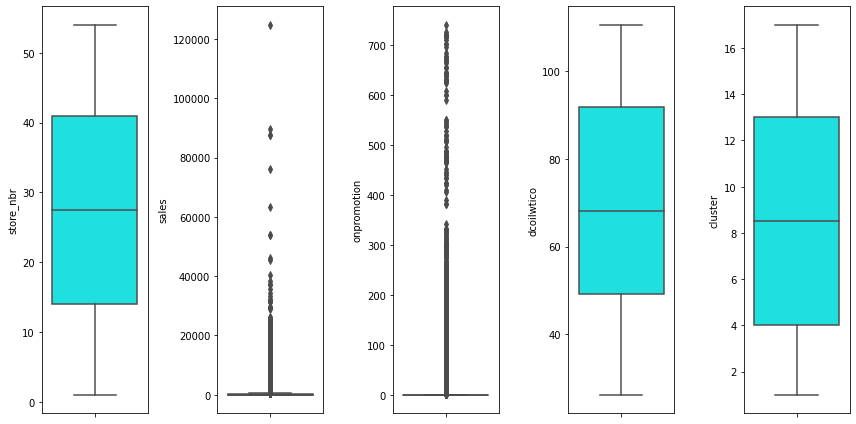

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=dataset[features[i]], color='cyan')
    plt.tight_layout()

Obervation:
1. There is no outlier in the in the column store_nbr, dcoilwtico, and cluster, except sales and onpromotion
2. The data distribution of sales and onpromotion are not symmetric and there's a lot of outlier data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

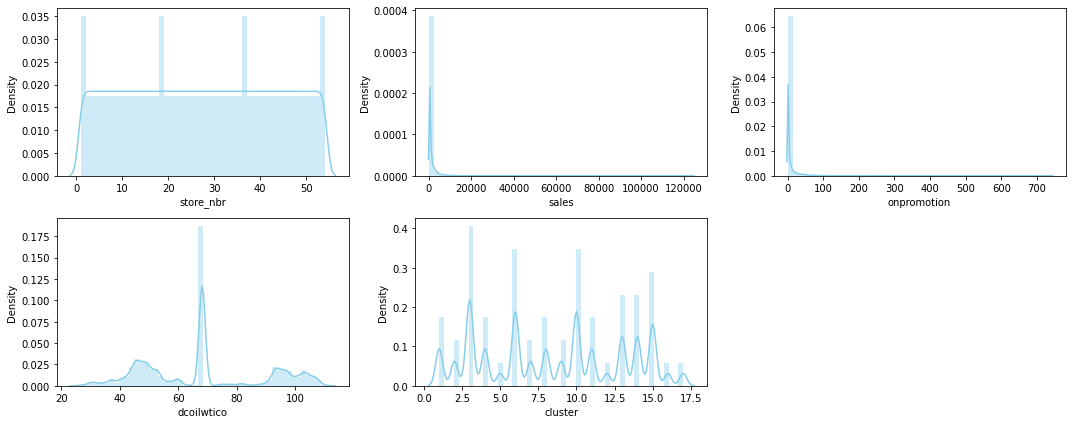

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(15,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=dataset[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Observation:

There's no symmetric distribution of data on the columns



## Multivatiate Analysis

### Categorical Variables

#### Family of Product

##### Graph of Amount of Family Product Sales in Day Type

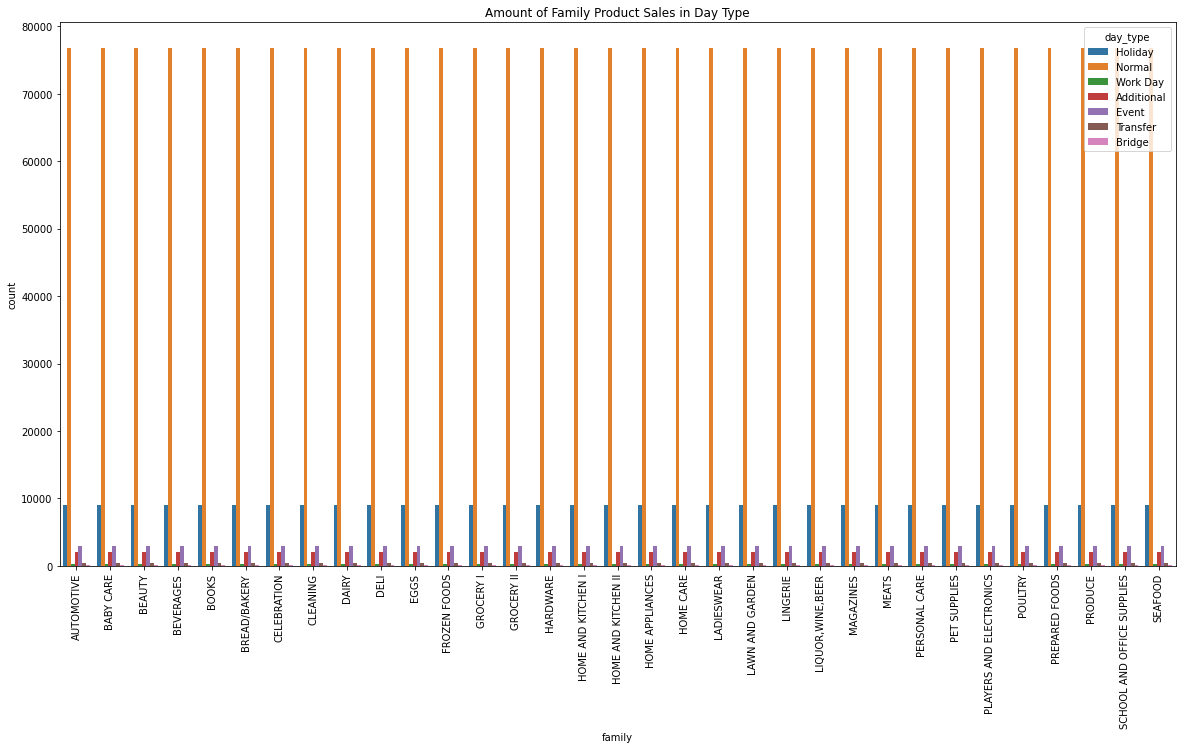

In [ ]:
plt.figure(figsize=(20,10))
plt.title ('Amount of Family Product Sales in Day Type')
plt.xticks(rotation=90)
sns.countplot(data=dataset,
            x='family',
            hue='day_type')

Observation :

From the graph, we know that all the family of product major sales in normal day

##### Graph of Amount Sales of Product Family

In [ ]:
# Grouping family and sum amounts of sales in each family #
family_sales = dataset.groupby(['family'], as_index= False)['sales'].sum().sort_values(['sales'],ascending=False)
family_sales

,family,sales
12,GROCERY I,3.471171e+08
3,BEVERAGES,2.188536e+08
30,PRODUCE,1.235924e+08
7,CLEANING,9.844516e+07
8,DAIRY,6.514906e+07
5,BREAD/BAKERY,4.252351e+07
28,POULTRY,3.219060e+07
24,MEATS,3.134803e+07
25,PERSONAL CARE,2.484152e+07
9,DELI,2.434040e+07


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


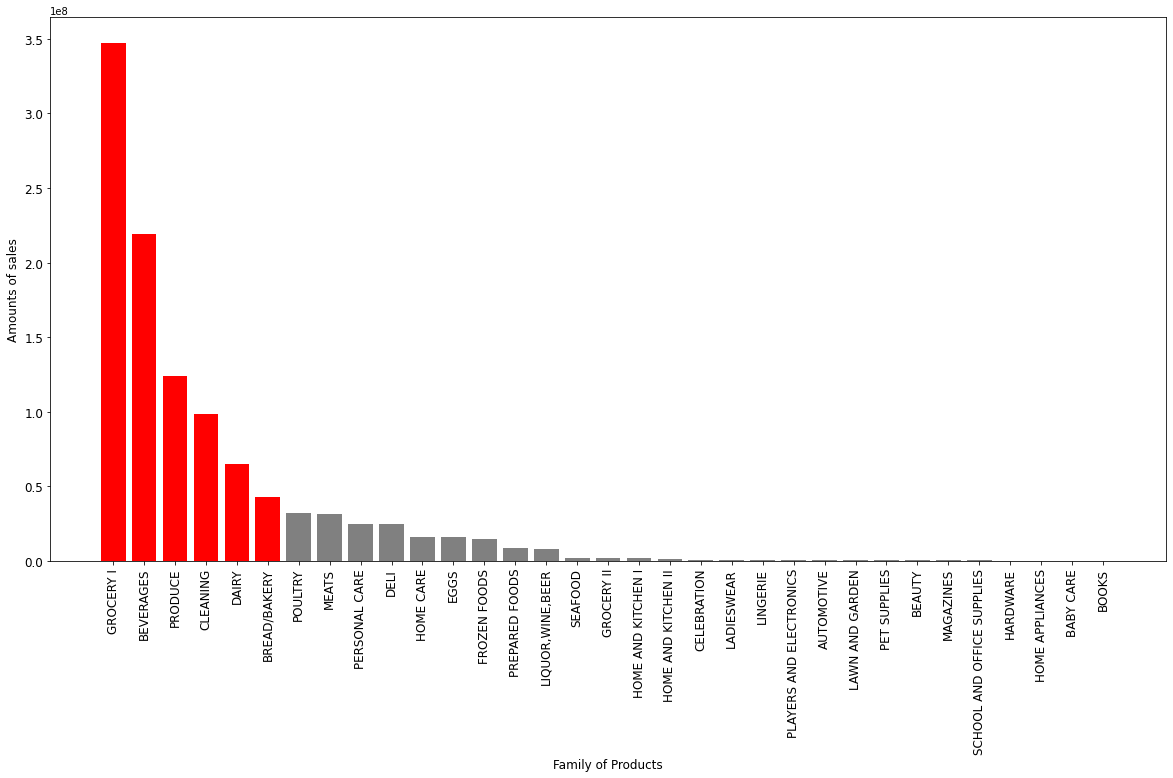

In [ ]:
# Create barchart of product family based on the amount of sales #
plt.figure(figsize=(20,10))
family_salesx = family_sales['family']
family_salesy = family_sales['sales']
sns.barplot(family_salesx,family_salesy)

#Naming chart and labels #
plt.xlabel('Family of Products',fontsize= 12)
plt.ylabel('Amounts of sales', fontsize=12)

#Formating barchart #
colors = ['r' if (bar > (family_sales['sales']).mean()) else 'grey' for bar in family_sales['sales']] # if the amount of complaint more than mean = red #
plt.bar(family_salesx, family_salesy, color=colors ) 
plt.xticks(rotation=90, fontsize=12)
plt.yticks (fontsize=12)
plt.show()

Observation :

We can say that, family of product which have sales more than average are grocery, beverages, produce, cleaning, dairy and bread/bakery. The largest sales volume is "Grocery".

#### City

##### Graph of Amount of City's Sales in Day Type

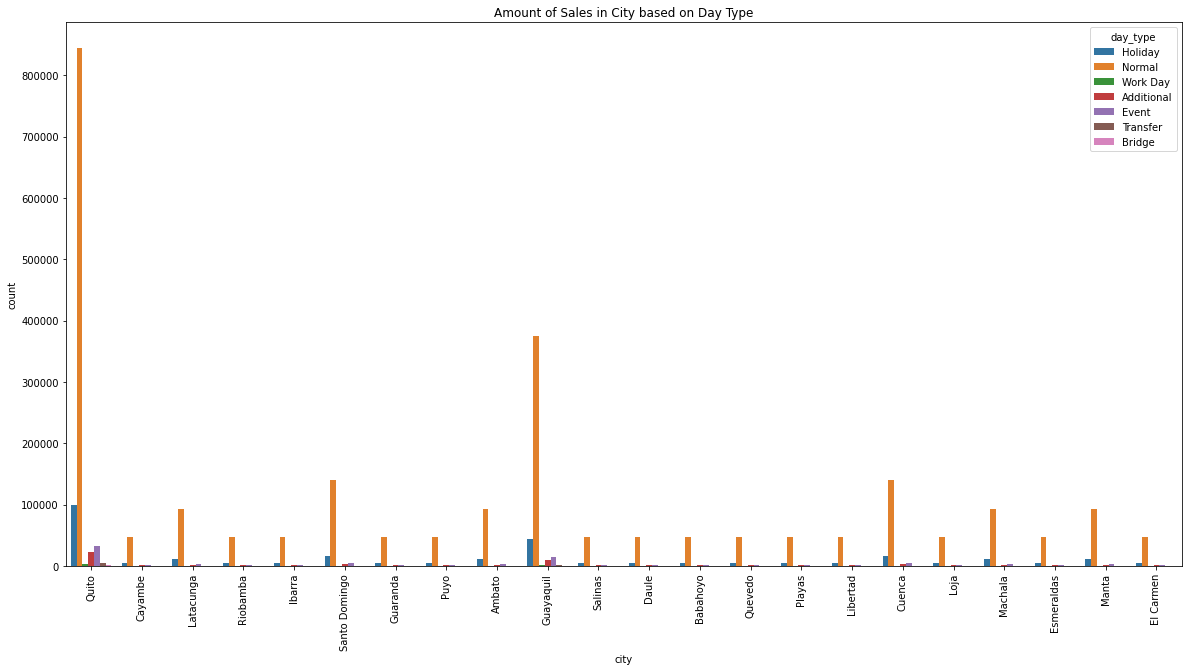

In [ ]:
plt.figure(figsize=(20,10))
plt.title ('Amount of Sales in City based on Day Type')
plt.xticks(rotation=90)
sns.countplot(data=dataset,
            x='city',
            hue='day_type')

Observation :

From the graph, we know that all of the city major sales in normal day

##### Graph of Amount Sales of City

In [ ]:
# Grouping city and amount of sales in each city #
city_sales = dataset.groupby(['city'], as_index= False)['sales'].sum().sort_values(['sales'],ascending=False)
city_sales

,city,sales
18,Quito,5.627972e+08
8,Guayaquil,1.241196e+08
3,Cuenca,4.960287e+07
0,Ambato,4.074154e+07
21,Santo Domingo,3.615472e+07
13,Machala,3.363615e+07
2,Cayambe,2.858618e+07
10,Latacunga,2.139002e+07
4,Daule,1.938294e+07
12,Loja,1.906360e+07


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


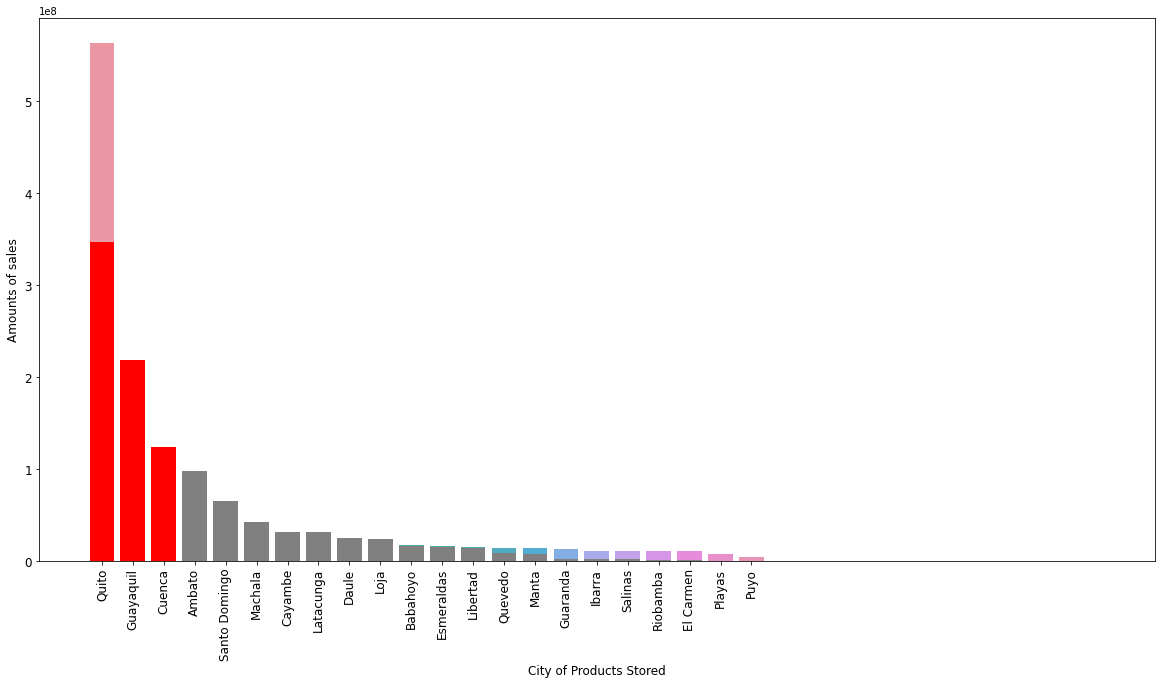

In [ ]:
# Create barchart of city based on the amount of sales #
plt.figure(figsize=(20,10))
city_salesx = city_sales['city']
city_salesy = city_sales['sales']
sns.barplot(city_salesx,city_salesy)

#Naming chart and labels #
plt.xlabel('City of Products Stored',fontsize= 12)
plt.ylabel('Amounts of sales', fontsize=12)

#Formating barchart #
colors = ['r' if (bar > (city_sales['sales']).mean()) else 'grey' for bar in city_sales['sales']] # if the amount of complaint more than mean = red #
plt.bar(family_salesx, family_salesy, color=colors ) 
plt.xticks(rotation=90, fontsize=12)
plt.yticks (fontsize=12)
plt.show()

Observation :

We can say that, city which have sales more than average are Quito, Guayaquil, andCuenca. The largest sales volume is "Quito".

#### State

##### Graph of Amount of State's Sales in Day Type

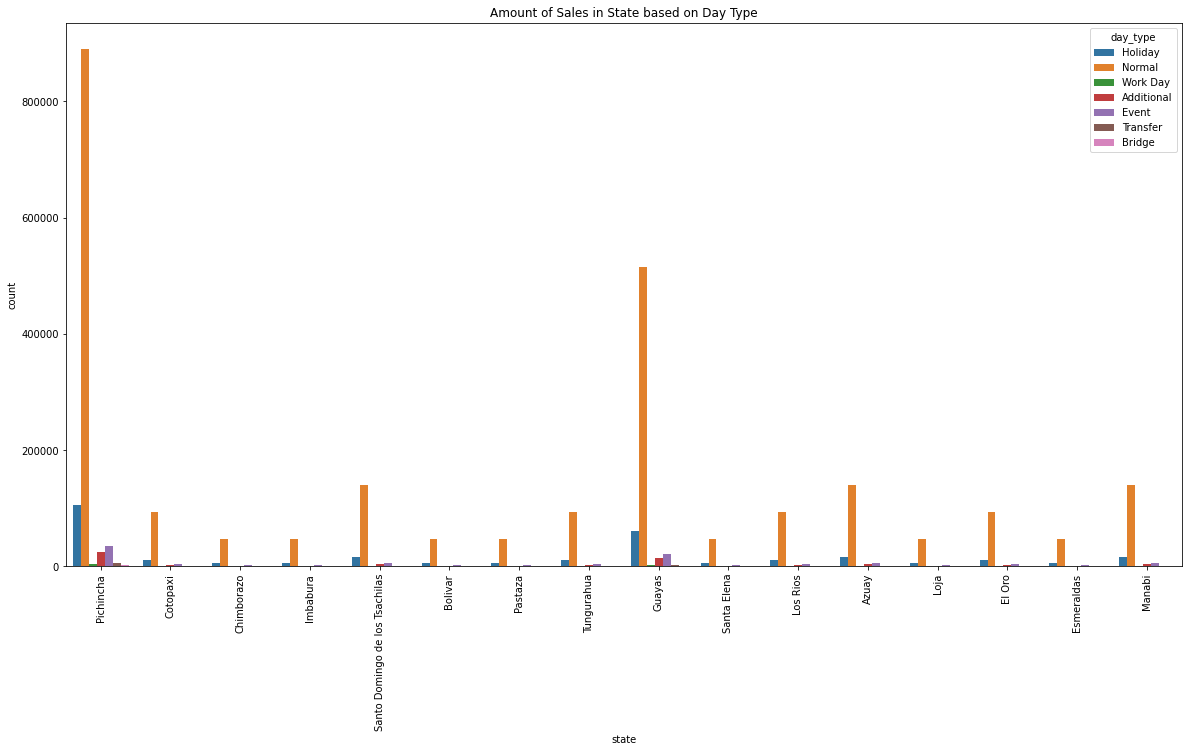

In [ ]:
plt.figure(figsize=(20,10))
plt.title ('Amount of Sales in State based on Day Type')
plt.xticks(rotation=90)
sns.countplot(data=dataset,
            x='state',
            hue='day_type')

Observation :

From the graph, we know that all of the state major sales in normal day

##### Graph of Amount Sales of State

In [ ]:
#grouping state and amount of sales
state_sales = dataset.groupby(['state'], as_index= False)['sales'].sum().sort_values(['sales'],ascending=False)
state_sales

,state,sales
12,Pichincha,5.913834e+08
6,Guayas,1.666926e+08
0,Azuay,4.960287e+07
15,Tungurahua,4.074154e+07
14,Santo Domingo de los Tsachilas,3.615472e+07
4,El Oro,3.363615e+07
9,Los Rios,3.223493e+07
10,Manabi,2.496312e+07
3,Cotopaxi,2.139002e+07
8,Loja,1.906360e+07


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


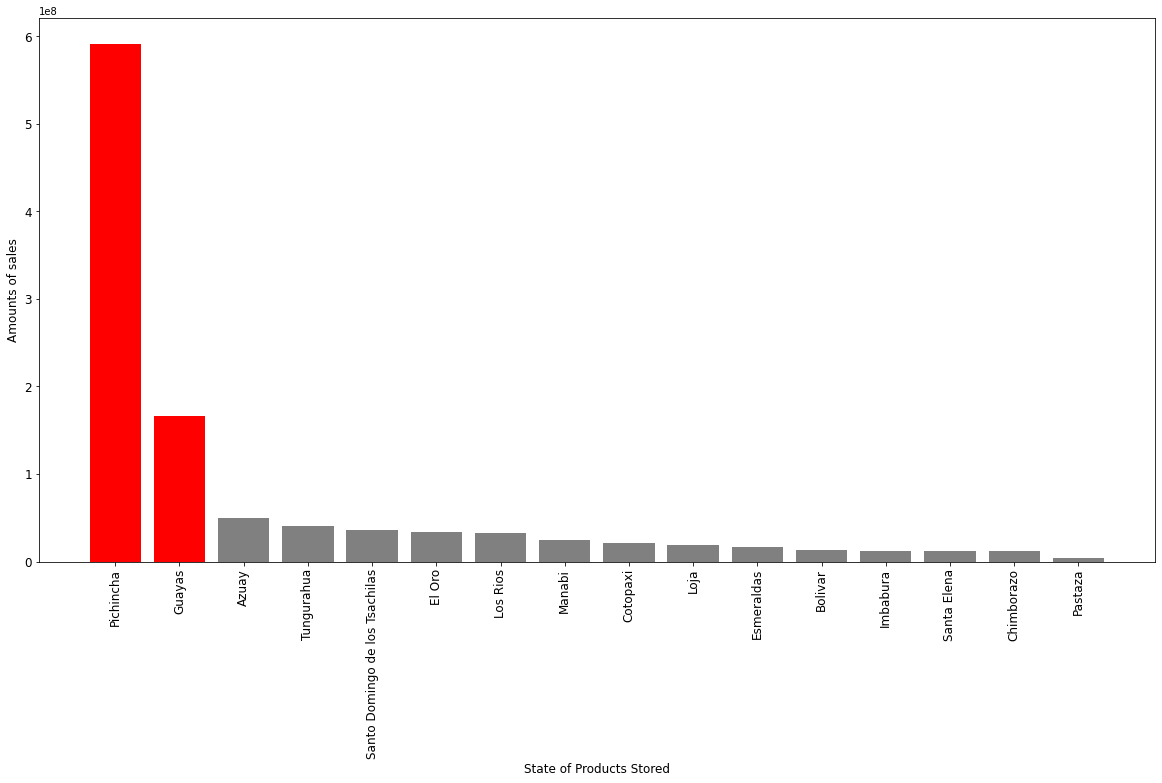

In [ ]:
# Create barchart of state based on the amount of sales #
plt.figure(figsize=(20,10))
state_salesx = state_sales['state']
state_salesy = state_sales['sales']
sns.barplot(state_salesx,state_salesy)

#Naming chart and labels #
plt.xlabel('State of Products Stored',fontsize= 12)
plt.ylabel('Amounts of sales', fontsize=12)

#Formating barchart #
colors = ['r' if (bar > (state_sales['sales']).mean()) else 'grey' for bar in state_sales['sales']] # if the amount of complaint more than mean = red #
plt.bar(state_salesx, state_salesy, color=colors ) 
plt.xticks(rotation=90, fontsize=12)
plt.yticks (fontsize=12)
plt.show()

Observation :

We can say that, state which have sales more than average are Pichincha and Guayas. The largest sales volume is "Pichincha".

#### Day Type

In [ ]:
#Grouping day type and amount of sales #
day_sales = dataset.groupby(['day_type'], as_index= False)['sales'].sum().sort_values(['sales'],ascending=False)
day_sales

,day_type,sales
4,Normal,8.894210e+08
3,Holiday,1.068429e+08
2,Event,4.247747e+07
0,Additional,3.302028e+07
5,Transfer,6.675451e+06
6,Work Day,3.315924e+06
1,Bridge,2.388330e+06


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


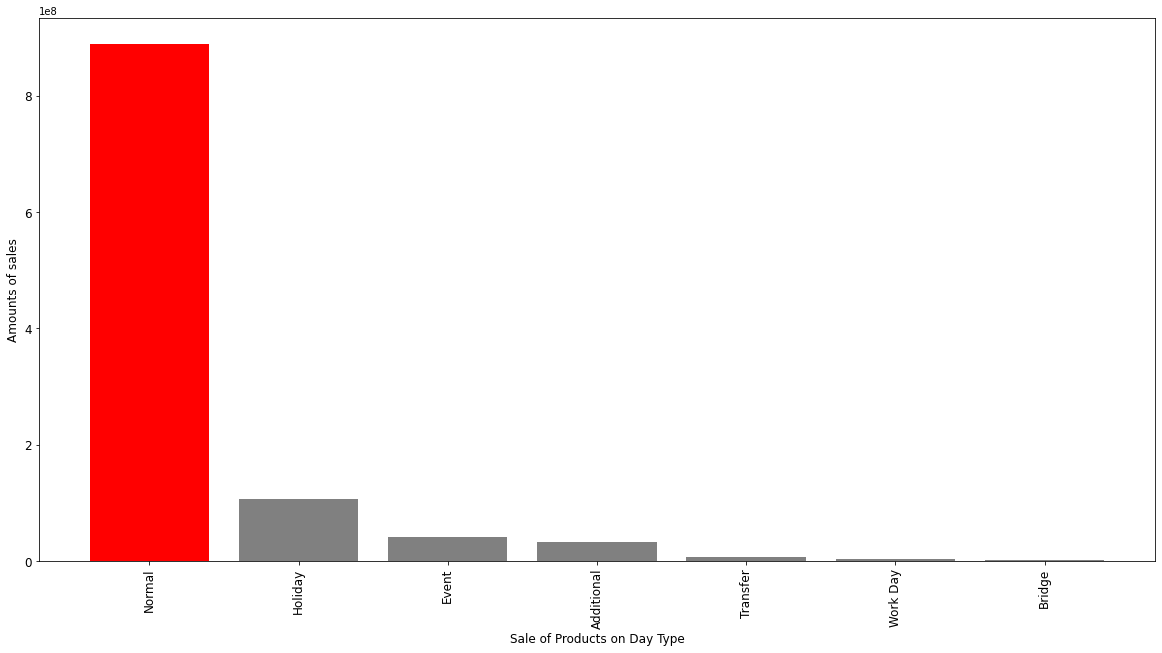

In [ ]:
# Create barchart of day type based on the amount of sales#
plt.figure(figsize=(20,10))
day_salesx = day_sales['day_type']
day_salesy = day_sales['sales']
sns.barplot(day_salesx,day_salesy)

#Naming chart and labels #
plt.xlabel('Sale of Products on Day Type',fontsize= 12)
plt.ylabel('Amounts of sales', fontsize=12)

#Formating barchart #
colors = ['r' if (bar > (day_sales['sales']).mean()) else 'grey' for bar in day_sales['sales']] # if the amount of complaint more than mean = red #
plt.bar(day_salesx, day_salesy, color=colors ) 
plt.xticks(rotation=90, fontsize=12)
plt.yticks (fontsize=12)
plt.show()

Observation :

We can say that, day type which have sales more than average is on the "Normal" day. It's inline with the graph result before, in every city/state/ family of product, the sales still have the largest amount in Normal Day.

### Numerical Variables

#### Correlation of each individual variables

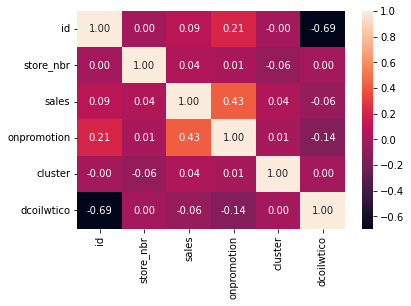

In [ ]:
# correlation heatmap
correlation = dataset.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Observation :

There's no significant correlated between variables of individual customers.


#### Pairplot of each individual variables

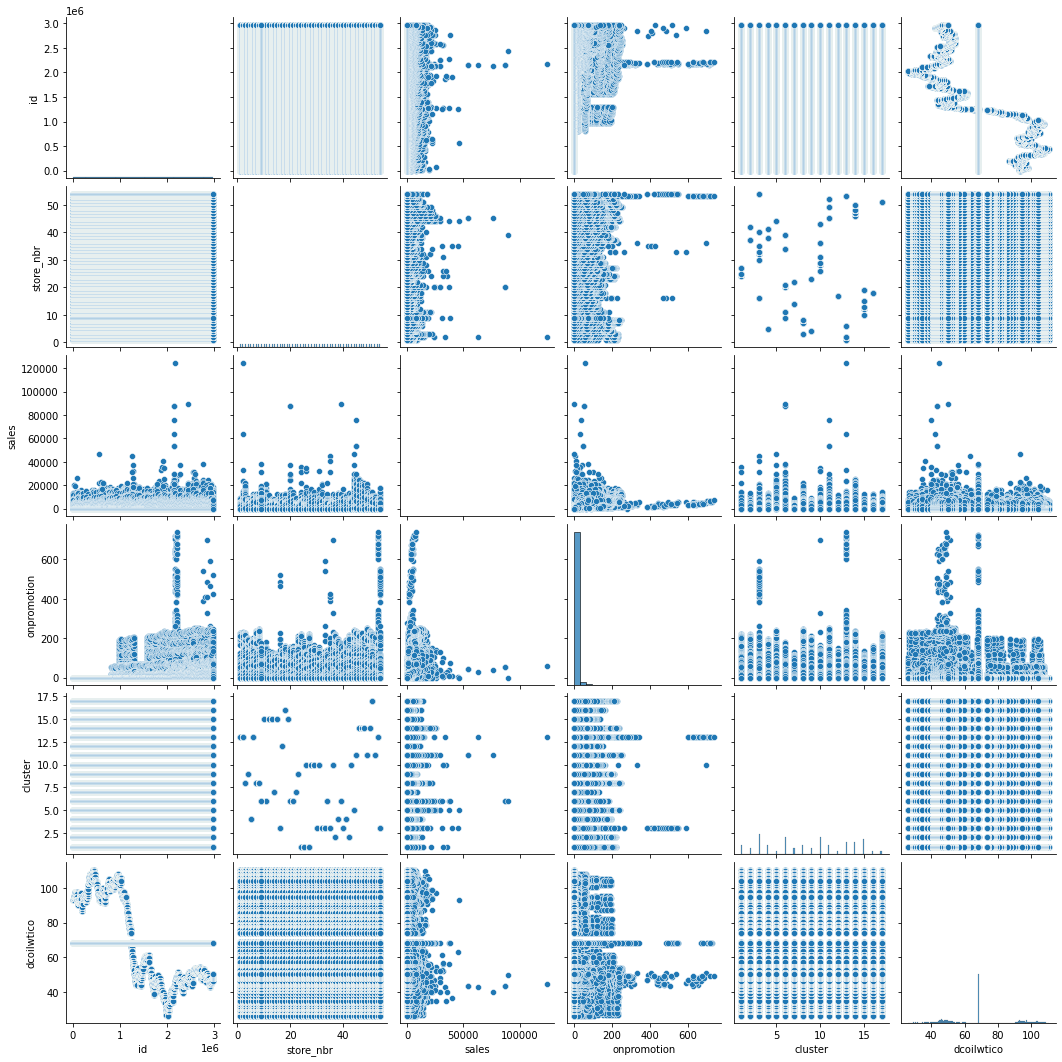

In [ ]:
# pairplot of the data
sns.pairplot(dataset)

Observation :

From the graph we know that sales and onpromotion evenly distribute data on store_nbr, cluster and dcoilwtico(oil price).

## Standard EDA Conclusion
1. The continuous numerical data doesn't contain normal distribution
2. Overall, the minimum and maximum values make sense for each column numerical. Except "onpromotion" column, because there's no data distribution
3. From the boxplot we can see there's no outlier in numerical data, except sales and onpromotion
4. From barcharts in Multivariate Analysis, we can know that :
    *   Family of product which have sales more than average are grocery, beverages, produce, cleaning, dairy and bread/bakery. The largest sales volume is "Grocery".

    *   City which have sales more than average are Quito, Guayaquil, andCuenca. The largest sales volume is "Quito".
    *   State which have sales more than average are Pichincha and Guayas. The largest sales volume is "Pichincha".
    *   Day type which have sales more than average is on the "Normal" day.





# Deep-Dive EDA

EDA Observation
1. How the growth of sales, product available on promotion and oil price?
2. How the correlation between sales, onpromotion and oilprice in monthly basis?
3. How the day type affect sales ?
4. Who is the top 10 customer who bought product the largest ?
5. How the growth of the sales in each city ?

## 1. How the growth of sales, product available on promotion and oil price?

In [ ]:
# Copy dataset into a new dataset
dataset2 = dataset[['id','date', 'family', 'sales', 'onpromotion', 'city', 'state', 'cluster', 'day_type', 'description', 'dcoilwtico']].copy()

#Change date data type to be datetime
dataset2["date"] = pd.to_datetime(dataset2["date"])

#Change data type date to be month-year
dataset2['date'] = dataset2['date'].dt.to_period('M')

In [ ]:
#Grouping monthly sales
monthly_sales = (dataset2
                .groupby('date')
                .agg(num_sales=('sales', 'sum'))
                .reset_index())

monthly_sales['date'] = monthly_sales['date'].astype(str) 
monthly_sales.head()

,date,num_sales
0,2013-01,1.032762e+07
1,2013-02,9.658960e+06
2,2013-03,1.142850e+07
3,2013-04,1.099346e+07
4,2013-05,1.198556e+07


In [ ]:
#Grouping product available on promotion
monthly_onpromotion = (dataset2
                .groupby('date')
                .agg(num_onpromotion=('onpromotion', 'sum'))
                .reset_index())

monthly_onpromotion['date'] = monthly_onpromotion['date'].astype(str) 
monthly_onpromotion.head()

,date,num_onpromotion
0,2013-01,0
1,2013-02,0
2,2013-03,0
3,2013-04,0
4,2013-05,0


In [ ]:
#Grouping average monthly oil price
monthly_oilprice = (dataset2
                .groupby('date')
                .agg(num_oilprice=('dcoilwtico', 'mean'))
                .reset_index())

monthly_oilprice['date'] = monthly_oilprice['date'].astype(str) 
monthly_oilprice.head()

,date,num_oilprice
0,2013-01,86.188720
1,2013-02,86.594082
2,2013-03,84.158915
3,2013-04,85.667942
4,2013-05,86.286573


#### Graph of Monthly Sales, Product Available on Promotion

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54],
 <a list of 55 Text major ticklabel objects>)

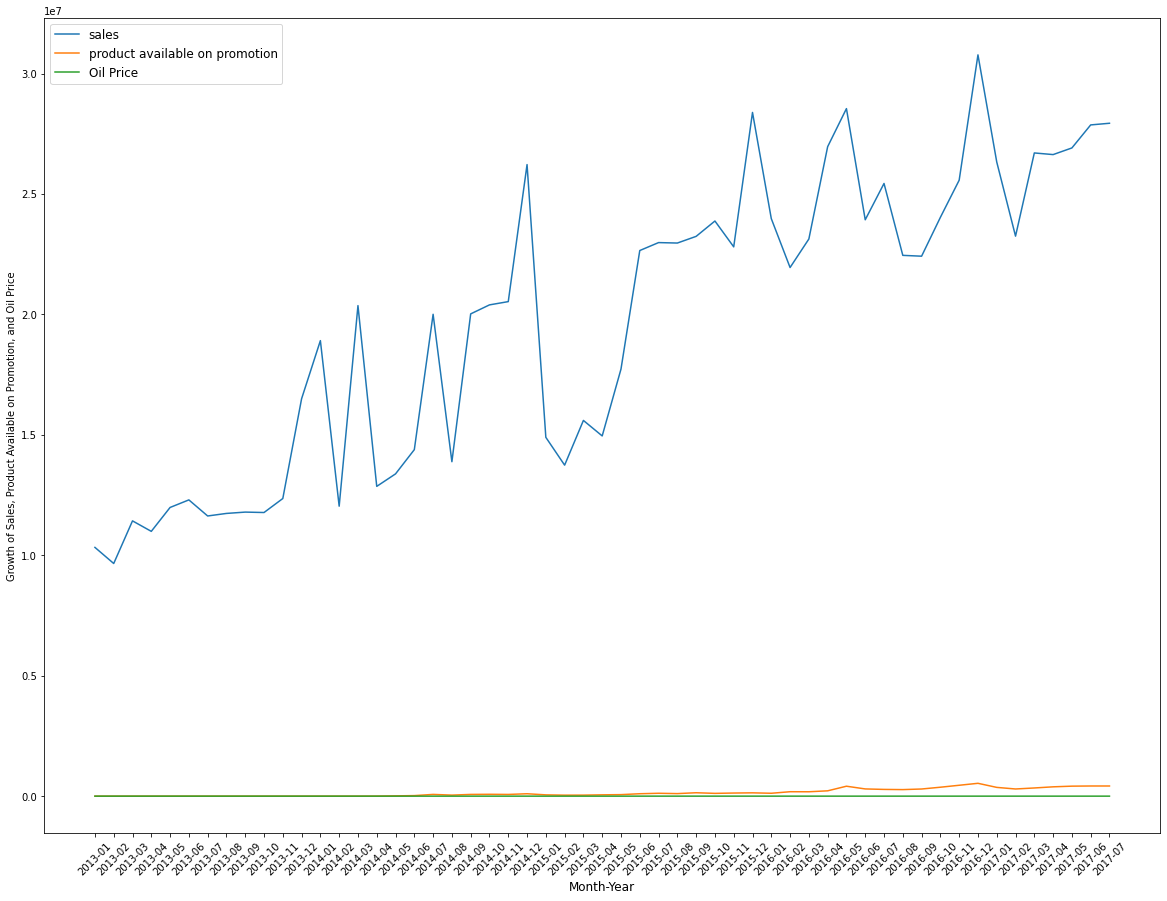

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(20,15))

ax.plot(monthly_sales['date'], monthly_sales['num_sales'], label= 'sales')
ax.plot(monthly_onpromotion['date'], monthly_onpromotion['num_onpromotion'], label= 'product available on promotion')
ax.plot(monthly_oilprice['date'], monthly_oilprice['num_oilprice'], label = 'Oil Price')

plt.xlabel('Month-Year',fontsize= 12)
plt.ylabel('Growth of Sales, Product Available on Promotion, and Oil Price')
plt.legend (fontsize=12, loc ='upper left')
plt.xticks(rotation=45)

Observation :

From the graph, we know that amount of sales has significant different of amount than the amount of product available on promotion and oil price, therefore any fluctuative of product available on promotion and oil price not refledted on the graph. Therefore need to visualize and analyze the data separately.

### Graph of Monthly Sales

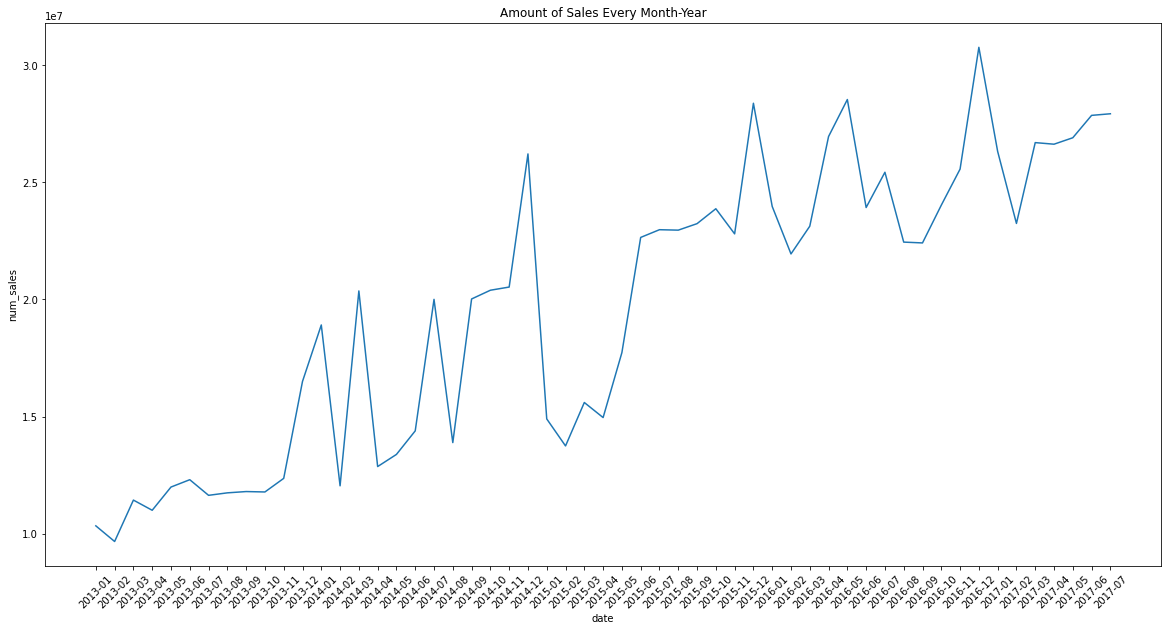

In [ ]:
# Visualize growth of total sales in each month-year#
plt.figure(figsize=(20,10)) # the size change to be bigger for seeing easily
sns.lineplot(data=monthly_sales,
             x='date',
             y='num_sales')
plt.xticks(rotation=45)
plt.title('Amount of Sales Every Month-Year')
plt.show()

Observation :

From the graph, we know that the sales of product very fluctuative every month-year, but overall there's still enhancement of growth sales from Jan 2013 till Jul 2017.

### Graph of Amount of Product Available on Promotion in Monthly Basis



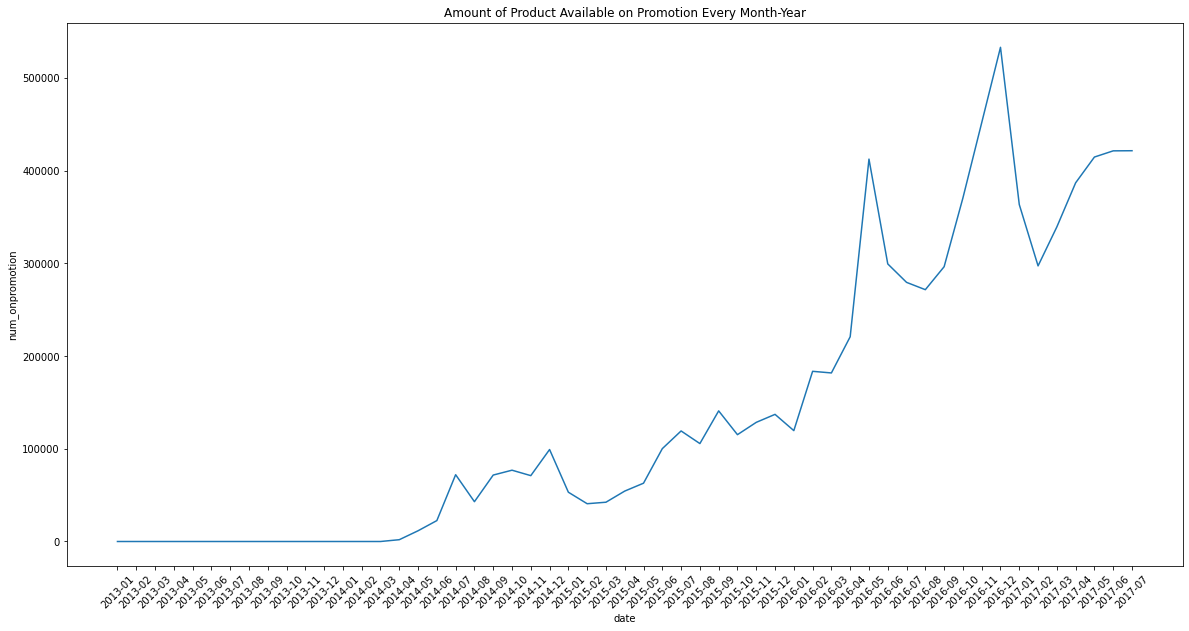

In [ ]:
# Visualize growth of total sales in each month-year#
plt.figure(figsize=(20,10)) # the size change to be bigger for seeing easily
sns.lineplot(data=monthly_onpromotion,
             x='date',
             y='num_onpromotion')
plt.xticks(rotation=45)
plt.title('Amount of Product Available on Promotion Every Month-Year')
plt.show()

Observation :

From the graph, we know that the product available on promotion very fluctuative every month-year, but overall there's still enhancement of growth of product available on promotion from Jan 2013 till Jul 2017. 

### Graph of Growth Oil Price in Monthly Basis

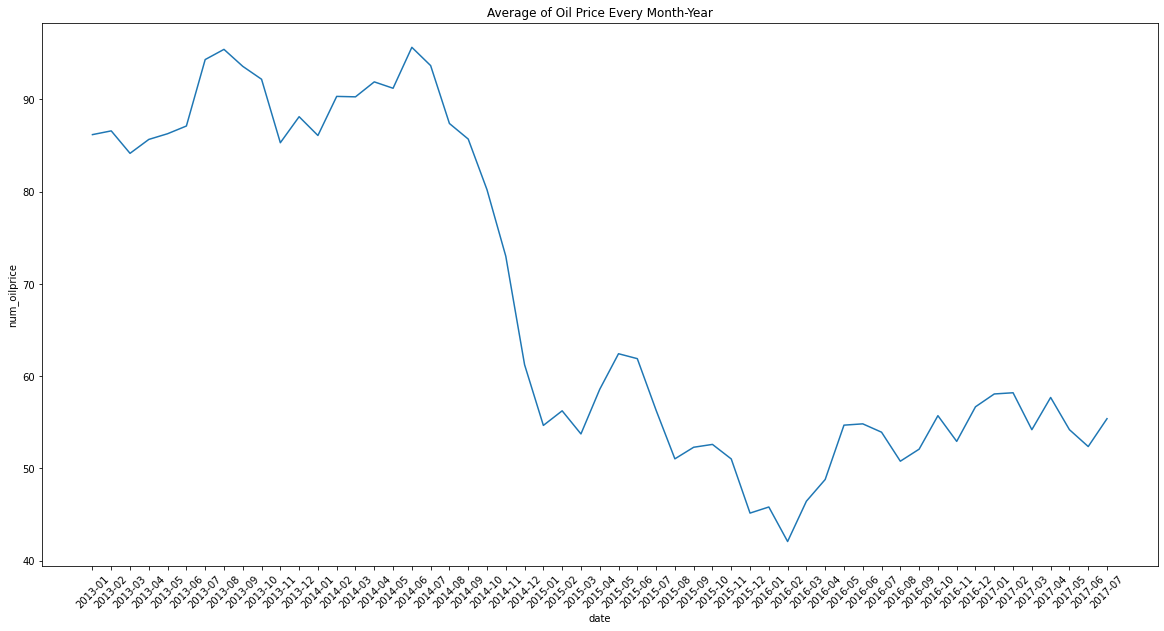

In [ ]:
# Visualize growth of mean oil price in each month-year#
plt.figure(figsize=(20,10)) # the size change to be bigger for seeing easily
sns.lineplot(data=monthly_oilprice,
             x='date',
             y='num_oilprice')
plt.xticks(rotation=45)
plt.title('Average of Oil Price Every Month-Year')
plt.show()

Observation :

From the graph, we know that the average oilprice very fluctuative every month-year, but overall there's still decline in oil price from Jan 2013 till Aug 2017. 

## 2. How the correlation between sales, onpromotion and oil price in monthly basis?

In [ ]:
#Grouping average monthly oil price
dataset3 = monthly_sales.merge(monthly_onpromotion,how='left', left_on='date', right_on='date')
dataset3.head()

,date,num_sales,num_onpromotion
0,2013-01,1.032762e+07,0
1,2013-02,9.658960e+06,0
2,2013-03,1.142850e+07,0
3,2013-04,1.099346e+07,0
4,2013-05,1.198556e+07,0


In [ ]:
dataset3 = dataset3.merge(monthly_oilprice,how='left', left_on='date', right_on='date')
dataset3.head()

,date,num_sales,num_onpromotion,num_oilprice
0,2013-01,1.032762e+07,0,86.188720
1,2013-02,9.658960e+06,0,86.594082
2,2013-03,1.142850e+07,0,84.158915
3,2013-04,1.099346e+07,0,85.667942
4,2013-05,1.198556e+07,0,86.286573


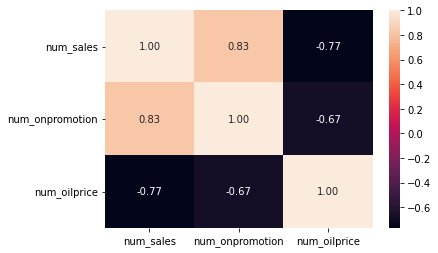

In [ ]:
# correlation heatmap
correlation = dataset3.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Observation :

From the graph, we know that the sum of sales, and sum of onpromotion  in aggregat monthly basis is positively correlation with each other, but sum of sales and average oil price in monthly basis has negatively correlation. It's very different with standard EDA, that individual customer doesn't have significant correlation of oil price (dcoilwtico), sales and onpromotion. But, in aggregate data it does have significant correlation.

 **Notes :** Because of the limited variables, therefore no need to drop any variables.

## 3. How the day type affect sales ?

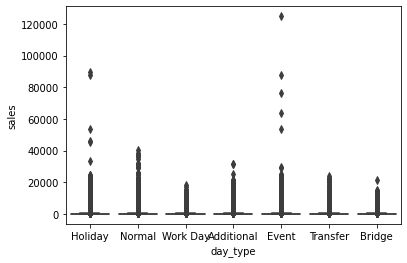

In [ ]:
#Visualize the sales in each day-type
sns.boxplot(x=dataset['day_type'],
            y=dataset['sales']
           )

Observation :

From the graph, we know that median of all of the day type are the same, but has the largest outlier when day type of event.

## 4. Who is the top 10 customer who bought product the largest ?

In [ ]:
top10_cust = (dataset
            .groupby('id')
            .agg(num_sales=('sales','sum'))
            .reset_index()
            .sort_values('num_sales',ascending=False)
            .head(10)
            )

top10_cust

,id,num_sales
2144154,2144154,174877.032
2163723,2163723,124717.000
2145045,2145045,107748.000
2445984,2445984,89576.360
2139699,2139699,76090.000
2153031,2153031,63434.000
2909844,2909844,52842.000
2144145,2144145,49224.000
2181576,2181576,48529.700
2909556,2909556,48045.000


Observation :

From the graph, we know that top 10 customer started with 48045 of product bought and maximum have bought 174877.032 products

## 5. How the growth of sales and product available in each city ?

### Graph of Sales in Each City Every Day

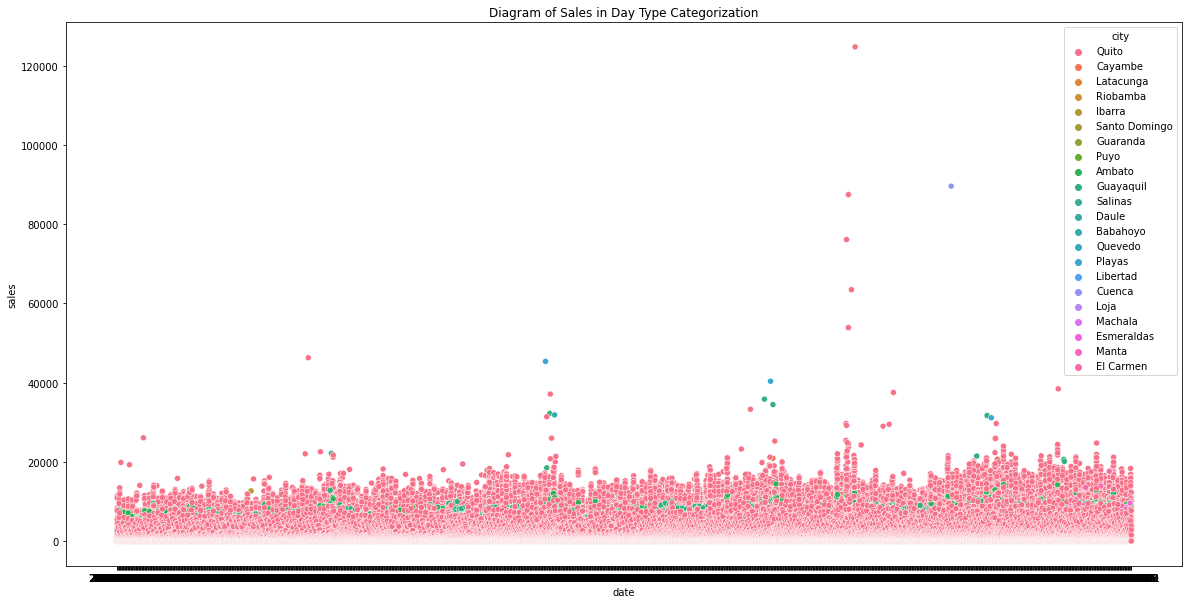

In [ ]:
# Create scatter plot of Sales each day in day_type #
plt.figure(figsize=(20,10))
sns.scatterplot(x=dataset['date'],
                y=dataset['sales'],
                hue=dataset['city'])
plt.title('Diagram of Sales in Day Type Categorization')
plt.show()

Observation :
From the graph, we know that the sales is dominant with sales in Quito, its inline with the result graph from standard EDA which the largest sales is in Quito.

### Graph of growth sales in each city

In [ ]:
# Grouping sales of each city in every month-year#
monthly_city_sales = (dataset2
                .groupby(['date','city'])
                .agg(num_sales=('sales','sum'))
                .reset_index())

monthly_city_sales['date'] = monthly_city_sales['date'].astype(str) 
monthly_city_sales.head()

,date,city,num_sales
0,2013-01,Ambato,495094.833199
1,2013-01,Babahoyo,162290.092029
2,2013-01,Cayambe,314470.838092
3,2013-01,Cuenca,415846.472072
4,2013-01,Daule,161554.362054


In [ ]:
# Define all of the city grouping #
monthly_quito =  monthly_city_sales[(monthly_city_sales['city'] == 'Quito')]
monthly_cayambe =  monthly_city_sales[(monthly_city_sales['city'] == 'Cayambe')]
monthly_latacunga =  monthly_city_sales[(monthly_city_sales['city'] == 'Latacunga')]
monthly_rio =  monthly_city_sales[(monthly_city_sales['city'] == 'Riobamba')]
monthly_ibarra =  monthly_city_sales[(monthly_city_sales['city'] == 'Ibarra')]
monthly_santo =  monthly_city_sales[(monthly_city_sales['city'] == 'Santo Domingo')]
monthly_guaranda =  monthly_city_sales[(monthly_city_sales['city'] == 'Guaranda')]
monthly_puyo =  monthly_city_sales[(monthly_city_sales['city'] == 'Puyo')]
monthly_ambato =  monthly_city_sales[(monthly_city_sales['city'] == 'Ambato')]
monthly_guaya =  monthly_city_sales[(monthly_city_sales['city'] == 'Guayaquil')]
monthly_salinas =  monthly_city_sales[(monthly_city_sales['city'] == 'Salinas')]
monthly_daule =  monthly_city_sales[(monthly_city_sales['city'] == 'Daule')]
monthly_baba =  monthly_city_sales[(monthly_city_sales['city'] == 'Babahoyo')]
monthly_que =  monthly_city_sales[(monthly_city_sales['city'] == 'Quevedo')]
monthly_playas =  monthly_city_sales[(monthly_city_sales['city'] == 'Playas')]
monthly_liber =  monthly_city_sales[(monthly_city_sales['city'] == 'Libertad')]
monthly_cuenca =  monthly_city_sales[(monthly_city_sales['city'] == 'Cuenca')]
monthly_loja =  monthly_city_sales[(monthly_city_sales['city'] == 'Loja')]
monthly_macha =  monthly_city_sales[(monthly_city_sales['city'] == 'Machala')]
monthly_esme =  monthly_city_sales[(monthly_city_sales['city'] == 'Esmeraldas')]
monthly_manta =  monthly_city_sales[(monthly_city_sales['city'] == 'Manta')]
monthly_carmen =  monthly_city_sales[(monthly_city_sales['city'] == 'El Carmen')]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54],
 <a list of 55 Text major ticklabel objects>)

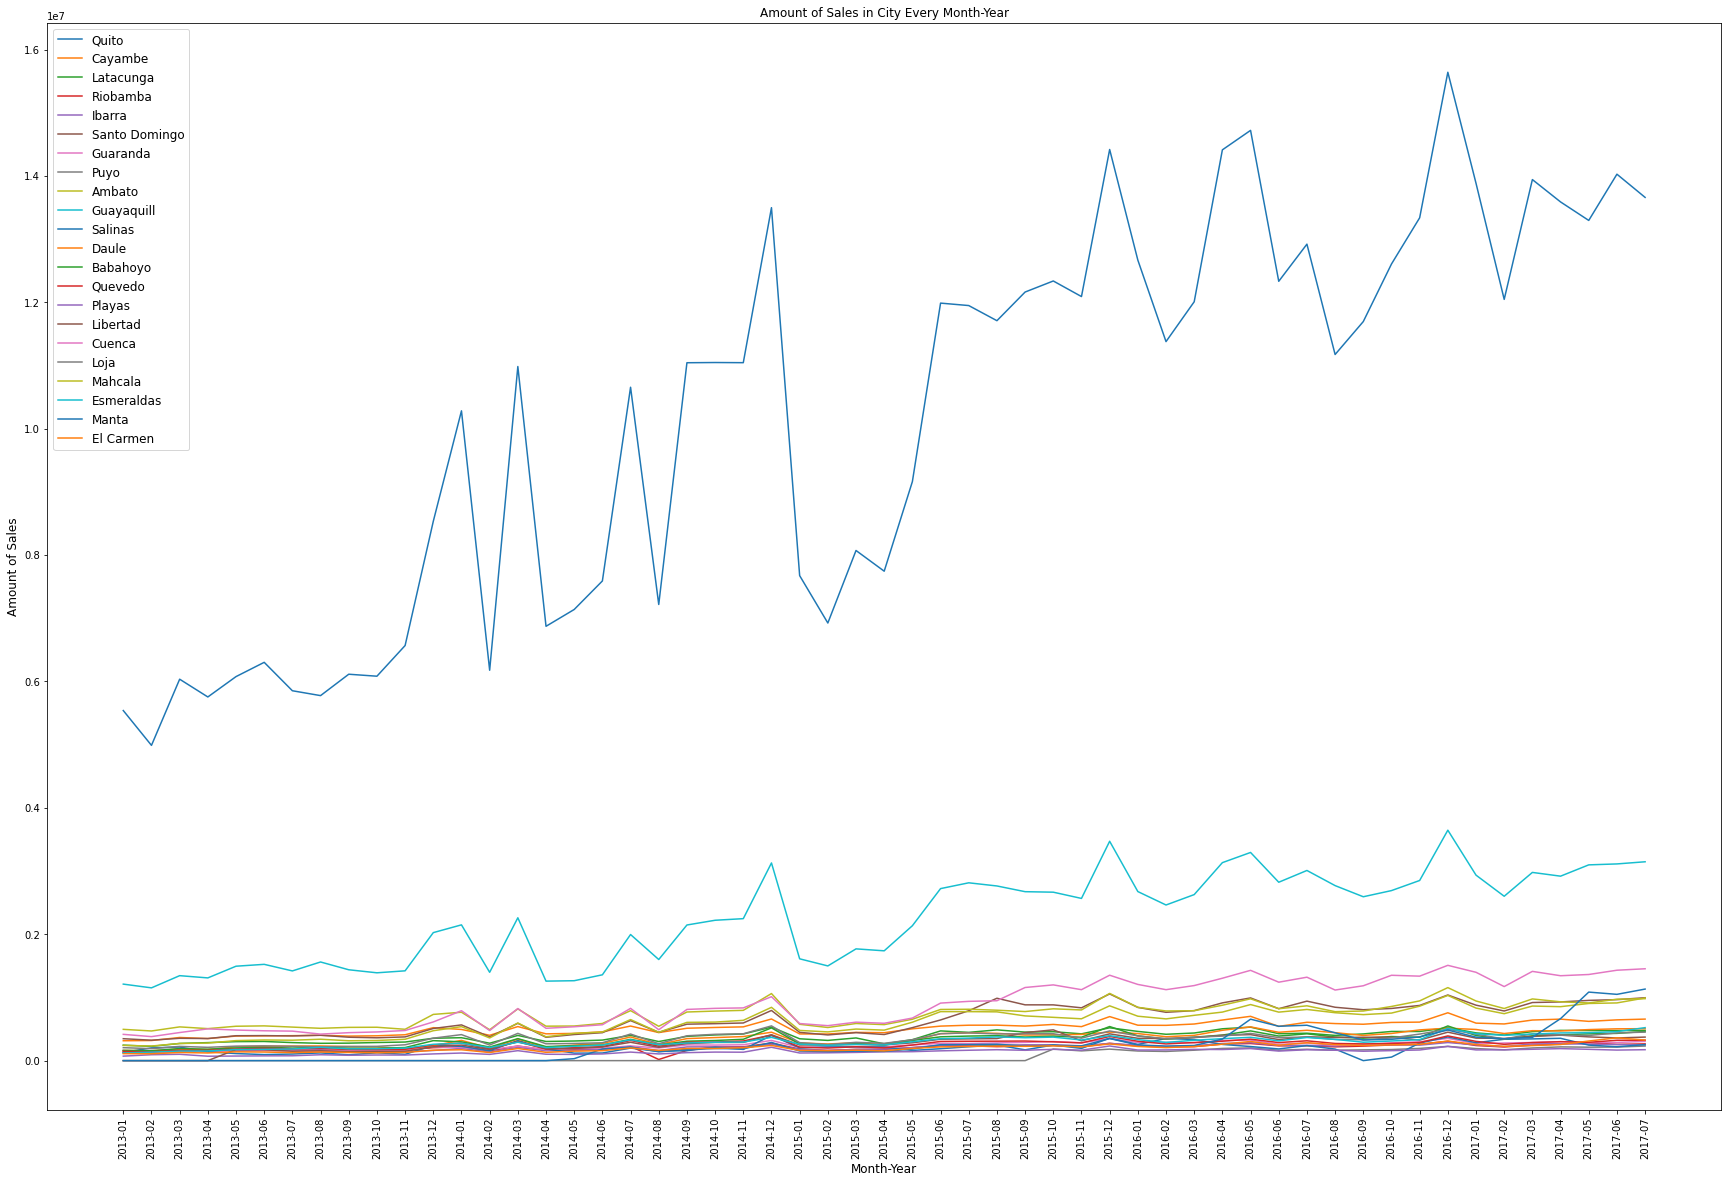

In [ ]:
#Visualize in line chart
fig, ax = plt.subplots(1,1,figsize=(30,20))

ax.plot(monthly_quito['date'], monthly_quito['num_sales'], label= 'Quito')
ax.plot(monthly_cayambe['date'], monthly_cayambe['num_sales'], label= 'Cayambe')
ax.plot(monthly_latacunga['date'], monthly_latacunga['num_sales'], label= 'Latacunga')
ax.plot(monthly_rio['date'], monthly_rio['num_sales'], label= 'Riobamba')
ax.plot(monthly_ibarra['date'], monthly_ibarra['num_sales'], label= 'Ibarra')
ax.plot(monthly_santo['date'], monthly_santo['num_sales'], label= 'Santo Domingo')
ax.plot(monthly_guaranda['date'], monthly_guaranda['num_sales'], label= 'Guaranda')
ax.plot(monthly_puyo['date'], monthly_puyo['num_sales'], label= 'Puyo')
ax.plot(monthly_ambato['date'], monthly_ambato['num_sales'], label= 'Ambato')
ax.plot(monthly_guaya['date'], monthly_guaya['num_sales'], label= 'Guayaquill')
ax.plot(monthly_salinas['date'], monthly_salinas['num_sales'], label= 'Salinas')
ax.plot(monthly_daule['date'], monthly_daule['num_sales'], label= 'Daule')
ax.plot(monthly_baba['date'], monthly_baba['num_sales'], label= 'Babahoyo')
ax.plot(monthly_que['date'], monthly_que['num_sales'], label= 'Quevedo')
ax.plot(monthly_playas['date'], monthly_playas['num_sales'], label= 'Playas')
ax.plot(monthly_liber['date'], monthly_liber['num_sales'], label= 'Libertad')
ax.plot(monthly_cuenca['date'], monthly_cuenca['num_sales'], label= 'Cuenca')
ax.plot(monthly_loja['date'], monthly_loja['num_sales'], label= 'Loja')
ax.plot(monthly_macha['date'], monthly_macha['num_sales'], label= 'Mahcala')
ax.plot(monthly_esme['date'], monthly_esme['num_sales'], label= 'Esmeraldas')
ax.plot(monthly_manta['date'], monthly_manta['num_sales'], label= 'Manta')
ax.plot(monthly_carmen['date'], monthly_carmen['num_sales'], label= 'El Carmen')

plt.xlabel('Month-Year',fontsize= 12)
plt.ylabel('Amount of Sales', fontsize =12)
plt.title('Amount of Sales in City Every Month-Year')
plt.legend (fontsize=12, loc ='upper left')
plt.xticks(rotation=90)

Observation :

From the graph, we know that the sales is dominant with sales in Quito, its inline with the result graph from standard EDA which the largest sales is in Quito.

## Deep-dive EDA Conclusion
1. The sales of product very fluctuative every month-year and has significant amount than product available on promotion and average of oil price, but overall there's still increase of growth sales from Jan 2013 till Jul 2017. It's inline with the increase product available on promotion and decrease of oil price which indicate Ecuador really sensitive with oil price. 
2. We know that the sum of sales, sum of onpromotion and average of oil price in aggregat monthly basis is significant correlation with each other. It's very different with standard EDA, that individual customer doesn't have significant correlation of oil price (dcoilwtico), sales and onpromotion. But, in aggregate data it does have significant correlation.
3. Customer usually buying in normal day, but in event day there's significant amount of buying product
4. Theres top 10 customer started with 48045 of product bought and maximum have bought 174877.032 products
5. the sales is dominant in Quito, its inline with the result graph from standard EDA which the largest sales is in Quito, but every city in aggregate has stagnan growth



# Modelling of Forecasting Sales

## Data Preprocessing In Modelling

### Label Encoding

In [ ]:
#Copy and create new dataset to explore the fit model
dataset4 = dataset[['id','date','store_nbr', 'family', 'sales', 'onpromotion', 'city', 'state', 'cluster', 'day_type', 'description', 'dcoilwtico']].copy()

#### Family

In [ ]:
# Label encoding on value of column "family" #
le = preprocessing.LabelEncoder()
le.fit(dataset4['family'])
dataset4['family_encoding'] = le.transform(dataset4['family']) 

In [ ]:
# Label encoding on value of column "family" #
family_encoding = dataset4[['family','family_encoding',]]
family_encoding.head()

,family,family_encoding
0,AUTOMOTIVE,0
1,BABY CARE,1
2,BEAUTY,2
3,BEVERAGES,3
4,BOOKS,4


#### City

In [ ]:
# Label encoding on value of column "city" #
le = preprocessing.LabelEncoder()
le.fit(dataset4['city'])
dataset4['city_encoding'] = le.transform(dataset4['city']) 

In [ ]:
# Label encoding on value of column "city" #
city_encoding = dataset4[['city','city_encoding',]]
city_encoding.head()

,city,city_encoding
0,Quito,18
1,Quito,18
2,Quito,18
3,Quito,18
4,Quito,18


#### State

In [ ]:
# Label encoding on value of column "city" #
le = preprocessing.LabelEncoder()
le.fit(dataset4['state'])
dataset4['state_encoding'] = le.transform(dataset4['state']) 

In [ ]:
# Label encoding on value of column "state" #
state_encoding = dataset4[['state','state_encoding',]]
state_encoding.head()

,state,state_encoding
0,Pichincha,12
1,Pichincha,12
2,Pichincha,12
3,Pichincha,12
4,Pichincha,12


#### Day Type

In [ ]:
# Label encoding on value of column "city" #
le = preprocessing.LabelEncoder()
le.fit(dataset4['day_type'])
dataset4['daytype_encoding'] = le.transform(dataset4['day_type']) 

In [ ]:
# Label encoding on value of column "state" #
daytype_encoding = dataset4[['day_type','daytype_encoding',]]
daytype_encoding.head()

,day_type,daytype_encoding
0,Holiday,3
1,Holiday,3
2,Holiday,3
3,Holiday,3
4,Holiday,3


### Handling Outlier Data



In [ ]:
dataset4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027618 entries, 0 to 3027617
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                int64  
 1   date              object 
 2   store_nbr         int64  
 3   family            object 
 4   sales             float64
 5   onpromotion       int64  
 6   city              object 
 7   state             object 
 8   cluster           int64  
 9   day_type          object 
 10  description       object 
 11  dcoilwtico        float64
 12  family_encoding   int64  
 13  city_encoding     int64  
 14  state_encoding    int64  
 15  daytype_encoding  int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 457.2+ MB


In [ ]:
dataset4.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,cluster,day_type,description,dcoilwtico,family_encoding,city_encoding,state_encoding,daytype_encoding
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,0,18,12,3
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,1,18,12,3
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,2,18,12,3
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,3,18,12,3
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,4,18,12,3


From univariate analysis, we know that there's a lot of outliers in sales data and onpromotion data. Therefore need to process more.

In [ ]:
numerical2 = ['sales', 'onpromotion']

In [ ]:
# numerical statistical sumary
dataset4[numerical2].describe()

,sales,onpromotion
count,3.027618e+06,3.027618e+06
mean,3.580840e+02,2.587650e+00
std,1.105955e+03,1.221098e+01
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,1.100000e+01,0.000000e+00
75%,1.957038e+02,0.000000e+00
max,1.247170e+05,7.410000e+02


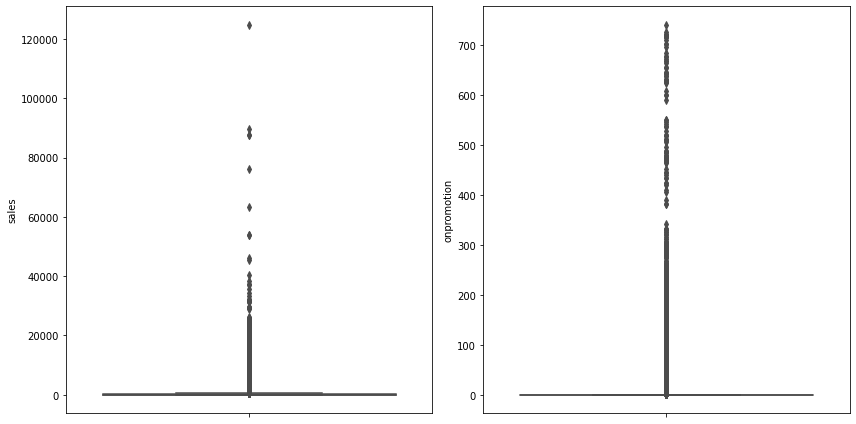

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numerical2
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=dataset4[features[i]], color='cyan')
    plt.tight_layout()

From the univariate analysis, we can know that there's a lot of outliers on variables "Sales" and "Onpromotion". Therefore, will use clipping method in specified threshold.

In [ ]:
#Check Quantile in Each Variables
dataset4[numerical2].quantile([0.975, .05], axis = 0)

,sales,onpromotion
0.975,3375.0,30.0
0.050,0.0,0.0


In [ ]:
#Cliping Numerical Data using quantile of 97,5% percentile
dataset4['sales'] = dataset4['sales'].clip(0, 3375, axis = 0)
dataset4['onpromotion'] = dataset4['sales'].clip(0, 30, axis = 0)
dataset4.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,cluster,day_type,description,dcoilwtico,family_encoding,city_encoding,state_encoding,daytype_encoding
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,0,18,12,3
1,1,2013-01-01,1,BABY CARE,0.0,0.0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,1,18,12,3
2,2,2013-01-01,1,BEAUTY,0.0,0.0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,2,18,12,3
3,3,2013-01-01,1,BEVERAGES,0.0,0.0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,3,18,12,3
4,4,2013-01-01,1,BOOKS,0.0,0.0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,4,18,12,3


In [ ]:
dataset4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027618 entries, 0 to 3027617
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                int64  
 1   date              object 
 2   store_nbr         int64  
 3   family            object 
 4   sales             float64
 5   onpromotion       float64
 6   city              object 
 7   state             object 
 8   cluster           int64  
 9   day_type          object 
 10  description       object 
 11  dcoilwtico        float64
 12  family_encoding   int64  
 13  city_encoding     int64  
 14  state_encoding    int64  
 15  daytype_encoding  int64  
dtypes: float64(3), int64(7), object(6)
memory usage: 457.2+ MB


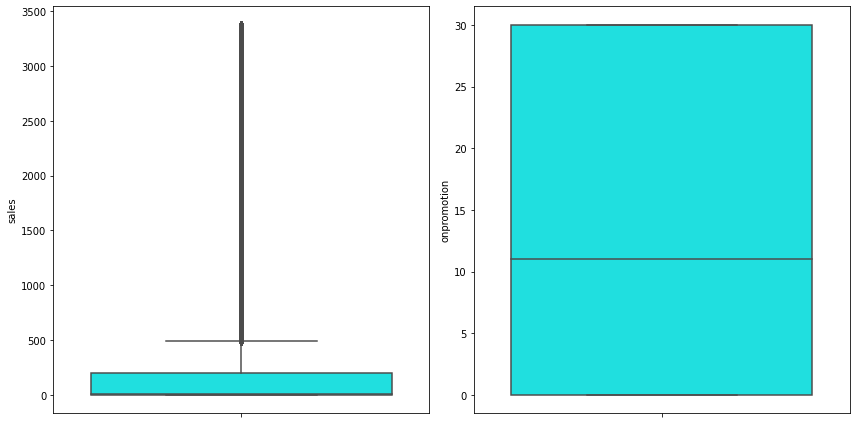

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numerical2
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=dataset4[features[i]], color='cyan')
    plt.tight_layout()

Observation :

After clipping upper limit of the sales and onpromotion using 97,5% percentile, it's finally not have any ouliers. Except the sales, it still have line avter the max value, therefore need to cliping the upper limit of sales

In [ ]:
#Cliping Numerical Data od "Sales" using quantile of 97,5% percentile
dataset4['sales'] = dataset4['sales'].clip(0, 490, axis = 0)
dataset4.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,cluster,day_type,description,dcoilwtico,family_encoding,city_encoding,state_encoding,daytype_encoding
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,0,18,12,3
1,1,2013-01-01,1,BABY CARE,0.0,0.0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,1,18,12,3
2,2,2013-01-01,1,BEAUTY,0.0,0.0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,2,18,12,3
3,3,2013-01-01,1,BEVERAGES,0.0,0.0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,3,18,12,3
4,4,2013-01-01,1,BOOKS,0.0,0.0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,4,18,12,3


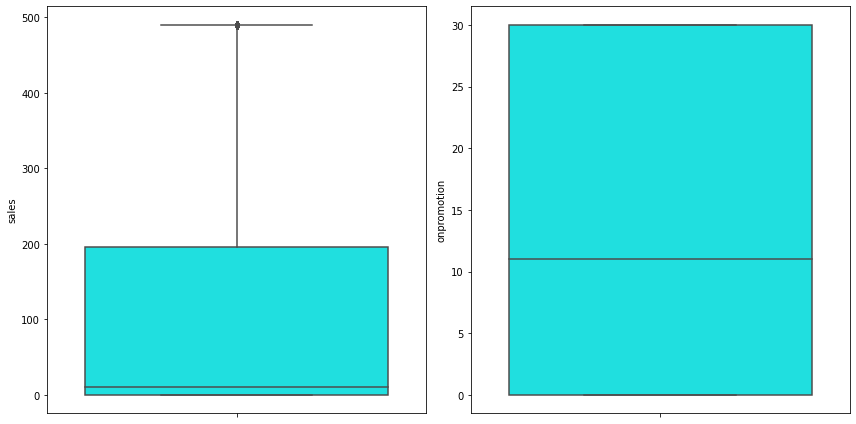

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numerical2
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=dataset4[features[i]], color='cyan')
    plt.tight_layout()

In [ ]:
# Re-check numerical statistical sumary
dataset4[numerical2].describe()

,sales,onpromotion
count,3.027618e+06,3.027618e+06
mean,1.229670e+02,1.478100e+01
std,1.823203e+02,1.377946e+01
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,1.100000e+01,1.100000e+01
75%,1.957038e+02,3.000000e+01
max,4.900000e+02,3.000000e+01


Dataset is ready to use in **modelling**




### Split Data

#### Preparing pretrain data and test data (80% vs 20% )

In [ ]:
# split train test
from sklearn.model_selection import train_test_split

X = dataset4[['city_encoding','store_nbr', 'family_encoding', 'onpromotion', 'state_encoding', 'cluster', 'daytype_encoding', 'dcoilwtico']]
y = dataset4[['sales']]

X_pretrain, X_test, y_pretrain, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Preparing train data and validate data (80% vs 20%)

In [ ]:
X_train, X_validate, y_train, y_validate = train_test_split(X_pretrain, y_pretrain, test_size=0.20, random_state=42)

Split data success!

## Draw correlation plot on training data and perform feature selection on highly correlated features

In [ ]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(X_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,city_encoding,1.447204
2,store_nbr,1.116891
3,family_encoding,1.000048
4,onpromotion,1.020766
5,state_encoding,1.388093
6,cluster,1.030733
7,daytype_encoding,1.002035
8,dcoilwtico,1.019265


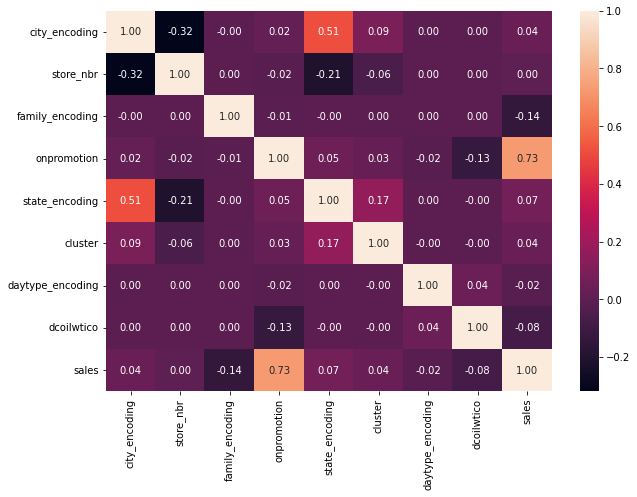

In [ ]:
# Recalculate heatmap correlation
sales_train = pd.concat([X_train, y_train], axis=1)
corr = sales_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

From heatmap & VIF score, we know that there's no significant correlation between variables, which is good. Therefore, can continue to anothe step.


## Choose the appropriate metric for fitting the model using Hyperparameter Tuning

### Ridge Regression

In [ ]:
# define ridge regression model
from sklearn.linear_model import Ridge

ridge_reg = Ridge(random_state=42)

In [ ]:
# tune lambda (denote as 'alpha' in sklearn)
# using GridSearchCV
from sklearn.model_selection import GridSearchCV

# hyperparameter values we want to tune
parameters = {
    'alpha': (0.000001,0.00001,0.0001,0.001, 
              0.01, 0.1, 1, 5, 10, 20)
}

# the tuning
ridge_reg_gridcv = GridSearchCV(ridge_reg, parameters, cv=5, 
                                scoring='neg_root_mean_squared_error')
ridge_reg_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(random_state=42),
             param_grid={'alpha': (1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20)},
             scoring='neg_root_mean_squared_error')

In [ ]:
# the complete results
pd.DataFrame(ridge_reg_gridcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.254329,0.009457,0.023453,0.002461,0.000001,{'alpha': 1e-06},-121.608632,-121.434856,-121.572393,-121.609172,-121.512295,-121.54747,0.066465,8
1,0.252880,0.002143,0.020935,0.000624,0.00001,{'alpha': 1e-05},-121.608632,-121.434856,-121.572393,-121.609172,-121.512295,-121.54747,0.066465,8
2,0.260845,0.011994,0.022610,0.001790,0.0001,{'alpha': 0.0001},-121.608632,-121.434856,-121.572393,-121.609172,-121.512295,-121.54747,0.066465,8
3,0.279605,0.021553,0.025371,0.006110,0.001,{'alpha': 0.001},-121.608632,-121.434856,-121.572393,-121.609172,-121.512295,-121.54747,0.066465,7
4,0.255136,0.004272,0.021706,0.001440,0.01,{'alpha': 0.01},-121.608632,-121.434856,-121.572393,-121.609172,-121.512295,-121.54747,0.066465,6
5,0.264067,0.017733,0.023601,0.004846,0.1,{'alpha': 0.1},-121.608632,-121.434856,-121.572393,-121.609172,-121.512295,-121.54747,0.066465,5
6,0.299178,0.004708,0.025903,0.000863,1,{'alpha': 1},-121.608632,-121.434856,-121.572393,-121.609172,-121.512295,-121.54747,0.066465,4
7,0.301631,0.004985,0.028922,0.006387,5,{'alpha': 5},-121.608632,-121.434856,-121.572393,-121.609172,-121.512295,-121.54747,0.066465,3
8,0.297397,0.002038,0.025298,0.000407,10,{'alpha': 10},-121.608632,-121.434856,-121.572393,-121.609172,-121.512295,-121.54747,0.066465,2
9,0.297942,0.003318,0.025231,0.000581,20,{'alpha': 20},-121.608632,-121.434856,-121.572393,-121.609172,-121.512295,-121.54747,0.066465,1


In [ ]:
# only show the most important columns
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result = pd.DataFrame(ridge_reg_gridcv.cv_results_)
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'alpha': 1e-06},-121.54747,8
1,{'alpha': 1e-05},-121.54747,8
2,{'alpha': 0.0001},-121.54747,8
3,{'alpha': 0.001},-121.54747,7
4,{'alpha': 0.01},-121.54747,6
5,{'alpha': 0.1},-121.54747,5
6,{'alpha': 1},-121.54747,4
7,{'alpha': 5},-121.54747,3
8,{'alpha': 10},-121.54747,2
9,{'alpha': 20},-121.54747,1


In [ ]:
# the best model
ridge_reg_gridcv.best_estimator_

Ridge(alpha=20, random_state=42)

Observation:

The best alpha (lambda) for ridge reggression is 20, because have the lowest mean test score.

### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

# define the model
lasso_reg = Lasso(random_state=42)

In [ ]:
# the tuning
lasso_reg_gridcv = GridSearchCV(lasso_reg, parameters, cv=5, 
                                scoring='neg_root_mean_squared_error')
lasso_reg_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(random_state=42),
             param_grid={'alpha': (1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20)},
             scoring='neg_root_mean_squared_error')

In [ ]:
# the complete results
pd.DataFrame(lasso_reg_gridcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.241132,0.043608,0.026562,0.001537,0.000001,{'alpha': 1e-06},-121.608632,-121.434856,-121.572393,-121.609172,-121.512295,-121.547470,0.066465,3
1,1.082849,0.079860,0.024783,0.001816,0.00001,{'alpha': 1e-05},-121.608632,-121.434856,-121.572393,-121.609172,-121.512295,-121.547470,0.066465,2
2,0.937360,0.054002,0.025401,0.002524,0.0001,{'alpha': 0.0001},-121.608632,-121.434856,-121.572393,-121.609172,-121.512296,-121.547470,0.066465,1
3,0.845537,0.044637,0.027402,0.002670,0.001,{'alpha': 0.001},-121.608630,-121.434854,-121.572392,-121.609174,-121.512298,-121.547470,0.066466,4
4,0.647886,0.062441,0.021769,0.002114,0.01,{'alpha': 0.01},-121.608609,-121.434835,-121.572388,-121.609200,-121.512321,-121.547470,0.066471,5
5,0.597355,0.048695,0.021680,0.002019,0.1,{'alpha': 0.1},-121.608470,-121.434714,-121.572411,-121.609528,-121.512621,-121.547549,0.066517,6
6,0.516657,0.012379,0.021104,0.000687,1,{'alpha': 1},-121.613358,-121.439818,-121.578432,-121.617456,-121.520714,-121.553956,0.066772,7
7,0.547816,0.040436,0.021614,0.001825,5,{'alpha': 5},-121.626178,-121.453063,-121.589774,-121.628105,-121.535005,-121.566425,0.065967,8
8,0.594857,0.075300,0.025527,0.002650,10,{'alpha': 10},-121.665554,-121.493038,-121.627269,-121.664945,-121.576140,-121.605389,0.064998,9
9,0.597417,0.047617,0.026722,0.001572,20,{'alpha': 20},-121.796024,-121.624501,-121.757435,-121.798391,-121.709830,-121.737236,0.064907,10


In [ ]:
# only show the most important columns
retain_cols1 = ['params','mean_test_score','rank_test_score']
cv_result1 = pd.DataFrame(lasso_reg_gridcv.cv_results_)
cv_result1[retain_cols]

,params,mean_test_score,rank_test_score
0,{'alpha': 1e-06},-121.547470,3
1,{'alpha': 1e-05},-121.547470,2
2,{'alpha': 0.0001},-121.547470,1
3,{'alpha': 0.001},-121.547470,4
4,{'alpha': 0.01},-121.547470,5
5,{'alpha': 0.1},-121.547549,6
6,{'alpha': 1},-121.553956,7
7,{'alpha': 5},-121.566425,8
8,{'alpha': 10},-121.605389,9
9,{'alpha': 20},-121.737236,10


In [ ]:
# the best model
lasso_reg_gridcv.best_estimator_

Lasso(alpha=0.0001, random_state=42)

Observation:

The best alpha (lambda) for lasso reggression is 0,0001, because have the lowest mean test score

##Train any classification model you’d prefer

### Ridge Regression

#### Train Any Classification using Train Data

In [ ]:
# define the model
ridge_reg_five = Ridge(alpha=5, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)
ridge_reg_twenty = Ridge(alpha=20, random_state=42)

# fit the model (training)
ridge_reg_five.fit(X_train, y_train)
ridge_reg_ten.fit(X_train, y_train)
ridge_reg_twenty.fit(X_train, y_train)

Ridge(alpha=20, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error
alphas = [5, 10, 20]
models = [ridge_reg_five,
          ridge_reg_ten,
          ridge_reg_twenty]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 5 is 121.54693215829006
RMSE of Ridge regression model with alpha = 10 is 121.54693215829049
RMSE of Ridge regression model with alpha = 20 is 121.54693215829231


After checking with multiple lambda in train set data, we found out that **alpha/lambda = 5** is the best of ridge (which different from the result of gridcv (alpha=20) ) with have residuals from regression line to data arount 121.54693215829006 (the lowest RSME)

#### Train Any Classification using Validation Data

In [ ]:
# define the model
ridge_reg_five = Ridge(alpha=5, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)
ridge_reg_twenty = Ridge(alpha=20, random_state=42)

# fit the model (training)
ridge_reg_five.fit(X_validate, y_validate)
ridge_reg_ten.fit(X_validate, y_validate)
ridge_reg_twenty.fit(X_validate, y_validate)

Ridge(alpha=20, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error
alphas = [5, 10, 20]
models = [ridge_reg_five,
          ridge_reg_ten,
          ridge_reg_twenty]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_validate)
    rmse = np.sqrt(mean_squared_error(y_validate,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 5 is 121.5348679051708
RMSE of Ridge regression model with alpha = 10 is 121.53486790517606
RMSE of Ridge regression model with alpha = 20 is 121.53486790519703


After checking with multiple lambda in validation set data, we found out that **alpha/lambda = 5** is the best of ridge (which different from the result of gridcv (alpha=20) ) with have residuals from regression line to data arount 121.5348679051708(the lowest RSME)

Conclusion :
From the train data and validation data, we know that the best lambda/alpha is 5 which have the lowest RMSE. Therefore will use alpha = 5 for modelling.

#### Modeling and Evaluation

In [ ]:
X_train.head()

,city_encoding,store_nbr,family_encoding,onpromotion,state_encoding,cluster,daytype_encoding,dcoilwtico
2921078,18,8,17,1.0,12,8,4,98.460000
2307599,18,47,8,30.0,12,14,4,68.196033
900632,8,24,29,30.0,6,1,4,87.830000
2042260,3,42,22,0.0,0,2,4,55.970000
1845514,3,39,22,30.0,0,6,4,48.340000


In [ ]:
from sklearn.linear_model import Ridge

# train the model
X_feature_train = X_train.to_numpy()
y_target_train = y_train.to_numpy()
y_target_train = y_target_train.reshape(len(y_target_train),)

# define the model
ridge_reg = Ridge(alpha=5, 
                  random_state=42)

ridge_reg.fit(X_feature_train, y_target_train)

Ridge(alpha=5, random_state=42)

In [ ]:
# retrieve the coefficients

data = X_train
model = ridge_reg

coef_ridge = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_ridge

,feature,coefficient
0,intercept,-9.606561
1,city_encoding,0.297776
2,store_nbr,0.315201
3,family_encoding,-2.634238
4,onpromotion,9.657971
5,state_encoding,1.362759
6,cluster,0.575253
7,daytype_encoding,-1.622133
8,dcoilwtico,0.128448


From the result, we know that if lambda = 0,1 will result model as below 

`Sales = -9.606561 + 0.297776 city_encoding + 0.315201 store_nbr - 2.634238 family_encoding + 9.657971 onpromotion + 1.362759 state_encoding + 0.575253 Cluster - 1.622133 day_type encoding + 0.128448 dcoilwtico`


From the model, we know that if 1% of city that has encoding = 1 increase (constant for another variables), will increase 0.297776 value of sales.


In [ ]:
from sklearn.metrics import r2_score

y_predict_train = ridge_reg.predict(X_feature_train)

print('R-squared for training data is {}'.format(r2_score(y_target_train, y_predict_train)))

R-squared for training data is 0.5554535396912856


From the result, we know that 55,545% of variables can explain the value of sales (dependent variables). And, another 55,445% explain by others variables.

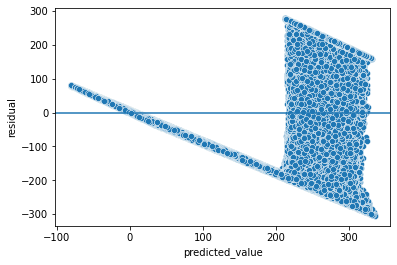

In [ ]:
# calculate residuals
residual = y_target_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

Observation :
1. linear relationship ? Yes, there's consistent line 
2. variance konstan ? No because there's variety of residuals even at the beginning there's consistent line
3. residual independen ? No because there's correlation

In [ ]:
# prepare prediction result on train data
y_predict_train = ridge_reg.predict(X_feature_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_target_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_target_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_target_train, y_predict_train)))

RMSE for training data is 121.54693215829006
MAE for training data is 91.88065939540236
MAPE for training data is 3.982593629834036e+16


From the result, we know that train data :

*   the spread of residuals from regression line is 121.54693215829006
*   mean absolute error of actual data to regression line is 91.88065939540236
*   percentage of mean absolute error of actual data to regression line is 3.982593629834036e+16, which is not good. Because it's really have a high mean absolute error, that indicate the sales of product significantly different.

### Lasso Regression

#### Train Any Classification using Train Data

In [ ]:
# define the model
lasso_reg_zerosix = Lasso(alpha=1e-06, random_state=42)
lasso_reg_zerofive = Lasso(alpha=1e-05, random_state=42)
lasso_reg_zerofour = Lasso(alpha= 0.0001, random_state=42)

# fit the model (training)
lasso_reg_zerosix.fit(X_train, y_train)
lasso_reg_zerofive.fit(X_train, y_train)
lasso_reg_zerofive.fit(X_train, y_train)

Lasso(alpha=1e-05, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error
alphas = [1e-06, 1e-05, 0.0001]
models = [lasso_reg_zerosix,
          lasso_reg_zerofive,
          lasso_reg_zerofive]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 1e-06 is 121.54693215828992
RMSE of Lasso regression model with alpha = 1e-05 is 121.54693215829072
RMSE of Lasso regression model with alpha = 0.0001 is 121.54693215829072


After checking with multiple lambda in train set data, we found out that **alpha/lambda = 0,0001 and 0,00001** is the best of lasso (which same from the result of gridcv (alpha=0001) ) with have residuals from regression line to data arount 121.54693215829072 (the lowest RSME)

#### Train Any Classification using Validate Data

In [ ]:
# define the model
lasso_reg_zerosix = Lasso(alpha=1e-06, random_state=42)
lasso_reg_zerofive = Lasso(alpha=1e-05, random_state=42)
lasso_reg_zerofour = Lasso(alpha= 0.0001, random_state=42)

# fit the model (training)
lasso_reg_zerosix.fit(X_validate, y_validate)
lasso_reg_zerofive.fit(X_validate, y_validate)
lasso_reg_zerofive.fit(X_validate, y_validate)

Lasso(alpha=1e-05, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error
alphas = [1e-06, 1e-05, 0.0001]
models = [lasso_reg_zerosix,
          lasso_reg_zerofive,
          lasso_reg_zerofive]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_validate)
    rmse = np.sqrt(mean_squared_error(y_validate,y_predict_validation))
    print(f'RMSE of Lassoregression model with alpha = {alpha} is {rmse}')

RMSE of Lassoregression model with alpha = 1e-06 is 121.53681453360063
RMSE of Lassoregression model with alpha = 1e-05 is 121.53681451820204
RMSE of Lassoregression model with alpha = 0.0001 is 121.53681451820204


After checking with multiple lambda in validation set data, we found out that **alpha/lambda = 0,000001** is the best of lasso (which same from the result of gridcv (alpha=0001) ) with have residuals from regression line to data arount 121.54693215829072 (the lowest RSME)

Conclusion :
Because there's no significant difference in RMSE of alpha 0,0001 in train data and validate data, therefore will use lambda/alpha = 0,0001 which have the lowest RMSE

#### Modeling and Evaluation

In [ ]:
from sklearn.linear_model import Lasso

# define the model
lasso_reg = Lasso(alpha=0.0001, 
                  random_state=42)

lasso_reg.fit(X_feature_train, y_target_train)

Lasso(alpha=0.0001, random_state=42)

In [ ]:
# retrieve the coefficients

data = X_train
model2 = lasso_reg

coef_lasso = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model2.intercept_] + list(model2.coef_)
})

coef_lasso

,feature,coefficient
0,intercept,-9.607071
1,city_encoding,0.297775
2,store_nbr,0.315201
3,family_encoding,-2.634237
4,onpromotion,9.657970
5,state_encoding,1.362754
6,cluster,0.575249
7,daytype_encoding,-1.621961
8,dcoilwtico,0.128447


From the result, we know that if lambda = 0,1 will result model as below 

`Sales = -9.607071 + 0.297775 city_encoding + 0.315201 store_nbr - 2.634237 family_encoding + 9.657970 onpromotion + 1.362754 state_encoding + 0.575249 Cluster - 1.621961 day_type encoding + 0.128447 dcoilwtico`


From the model, we know that if 1% of city that has encoding = 1 increase (constant for another variables), will increase 0.297775 value of sales.


In [ ]:
from sklearn.metrics import r2_score

y_predict_train2 = lasso_reg.predict(X_feature_train)

print('R-squared for training data is {}'.format(r2_score(y_target_train, y_predict_train2)))

R-squared for training data is 0.555453539690708


From the result, we know that 55,545% of variables can explain the value of sales (dependent variables). And, another 55,445% explain by others variables.

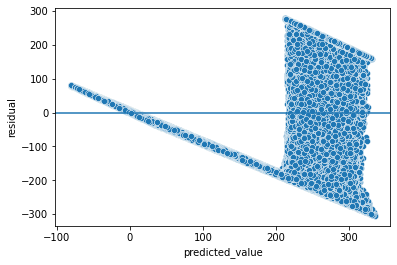

In [ ]:
# calculate residuals
residual = y_target_train - y_predict_train2

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train2,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

Observation :
1. linear relationship ? Yes, there's consistent line 
2. variance konstan ? No because there's variety of residuals even at the beginning there's consistent line
3. residual independen ? No because there's correlation

In [ ]:
# prepare prediction result on train data
y_predict_train2 = lasso_reg.predict(X_feature_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_target_train, y_predict_train2))))
print('MAE for training data is {}'.format(mean_absolute_error(y_target_train, y_predict_train2)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_target_train, y_predict_train2)))

RMSE for training data is 121.54693215836905
MAE for training data is 91.88065517100044
MAPE for training data is 3.982591402460563e+16


From the result, we know that train data :

*   the spread of residuals from regression line is 121.54693215836905
*   mean absolute error of actual data to regression line is 91.88065517100044
*   percentage of mean absolute error of actual data to regression line is 3.982591402460563e+16, which is not good. Because it's really have a high mean absolute error, that indicate the sales of product significantly different.

##Evaluate the Model on Test Data

### Ridge Regression

In [ ]:
# prepare prediction result on test data
X_feature_test = X_test.to_numpy()
y_predict_test = ridge_reg.predict(X_feature_test)

# ground truth target
y_target_test = y_test.to_numpy()
y_target_test = y_target_test.reshape(len(y_target_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_target_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_target_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_target_test, y_predict_test)))

RMSE for testing data is 121.62305140000414
MAE for testing data is 91.94818620077154
MAPE for testing data is 3.972261653871982e+16


Before, we know that train data :
*   the spread of residuals from regression line is 121.54693215829006
*   mean absolute error of actual data to regression line is 91.88065939540236
*   percentage of mean absolute error of actual data to regression line is 3.982593629834036e+16, which is not good. Because it's really have a high mean absolute error, that indicate the sales of product significantly different.

But from the result of test data :
*   the spread of residuals from regression line is 121.62305140000414
*   mean absolute error of actual data to regression line is 91.94818620077154
*   percentage of mean absolute error of actual data to regression line is 3.972261653871982e+16, which is not good. Because it's really have a high mean absolute error, that indicate the sales of product significantly different.

As the result of MAPE above we know that there's a acceptable for ridge model because  the percentage of error no significant different from  3.982593629834036e+16(in train data) become 3.972261653871982e+16 (in test data)

### Lasso Regression

In [ ]:
# prepare prediction result on test data
X_feature_test = X_test.to_numpy()
y_predict_test = lasso_reg.predict(X_feature_test)

# ground truth target
y_target_test = y_test.to_numpy()
y_target_test = y_target_test.reshape(len(y_target_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_target_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_target_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_target_test, y_predict_test)))

RMSE for testing data is 121.62305145549408
MAE for testing data is 91.94818215247673
MAPE for testing data is 3.972259484836414e+16


Before, we know that train data :
*   the spread of residuals from regression line is 121.54693215836905
*   mean absolute error of actual data to regression line is 91.88065517100044
*   percentage of mean absolute error of actual data to regression line is 3.982591402460563e+16, which is not good. Because it's really have a high mean absolute error, that indicate the sales of product significantly different.

But from the result of test data :
*   the spread of residuals from regression line is 121.62305145549408
*   mean absolute error of actual data to regression line is 91.94818215247673
*   percentage of mean absolute error of actual data to regression line is 3.972259484836414e+16, which is not good. Because it's really have a high mean absolute error, that indicate the sales of product significantly different.

As the result of MAPE above we know that there's a acceptable for ridge model because  the percentage of error no significant different from  3.982591402460563e+16(in train data) become 3.972259484836414e+16 (in test data)

## Feature Importance

### Ridge Regression

In [ ]:
# retrieve the coefficients

data = X_train
model = ridge_reg

coef_ridge = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_ridge

,feature,coefficient
0,intercept,-9.606561
1,city_encoding,0.297776
2,store_nbr,0.315201
3,family_encoding,-2.634238
4,onpromotion,9.657971
5,state_encoding,1.362759
6,cluster,0.575253
7,daytype_encoding,-1.622133
8,dcoilwtico,0.128448


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

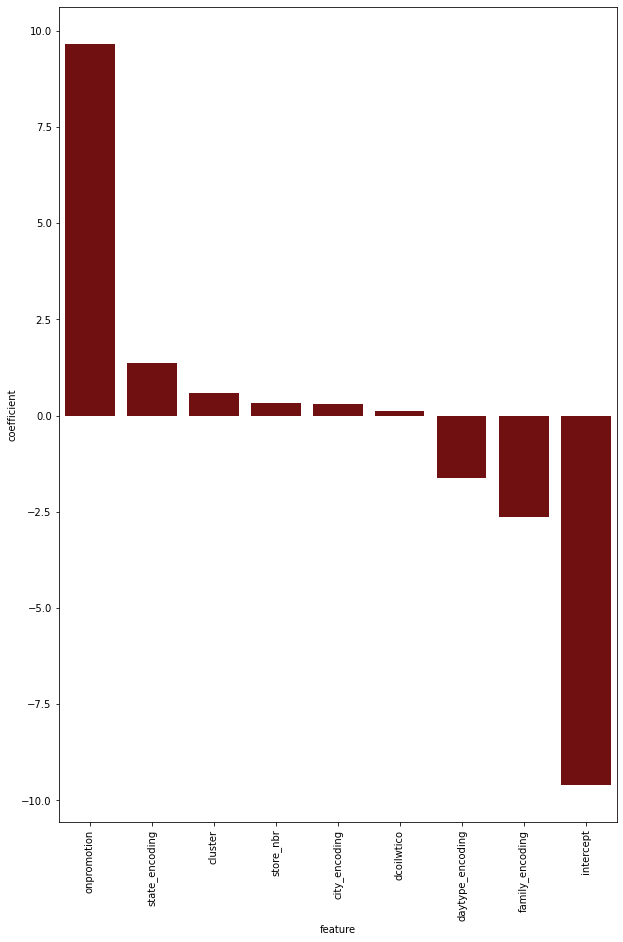

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,15))
sns.barplot(x='feature', y='coefficient', color='#800000',data=coef_ridge.reset_index().sort_values(['coefficient'],ascending=False))
plt.xticks(rotation=90)

Observation :

From the graph we can know that onpromotion is the most important variables.

### Lasso Regression

In [ ]:
# retrieve the coefficients

data = X_train
model2 = lasso_reg

coef_lasso = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model2.intercept_] + list(model2.coef_)
})

coef_lasso

,feature,coefficient
0,intercept,-9.607071
1,city_encoding,0.297775
2,store_nbr,0.315201
3,family_encoding,-2.634237
4,onpromotion,9.657970
5,state_encoding,1.362754
6,cluster,0.575249
7,daytype_encoding,-1.621961
8,dcoilwtico,0.128447


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

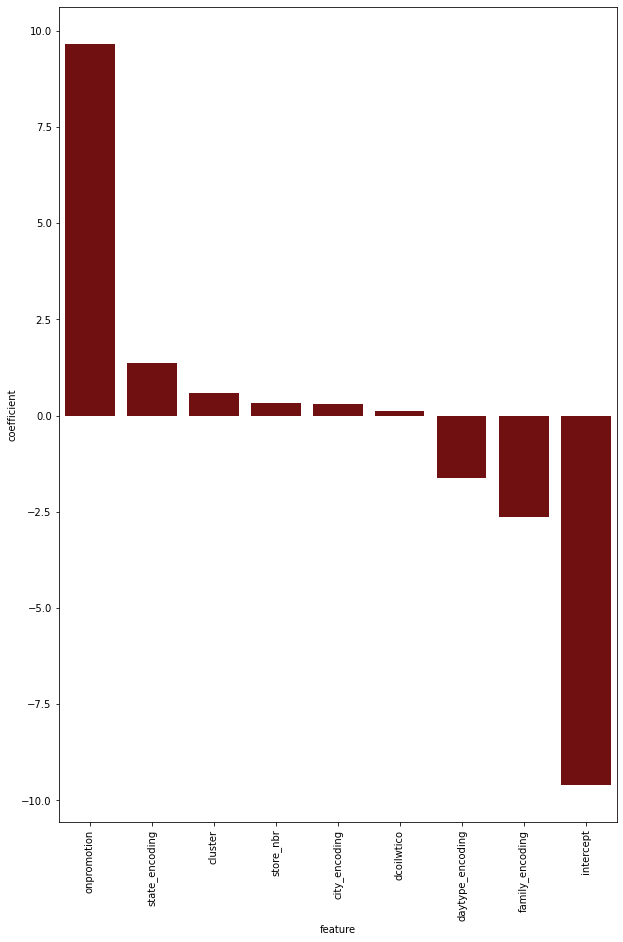

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,15))
sns.barplot(x='feature', y='coefficient', color='#800000',data=coef_lasso.reset_index().sort_values(['coefficient'],ascending=False))
plt.xticks(rotation=90)

Observation :

From the graph we can know that onpromotion is the most important variables.

# Business Solution (Conclusion)



1.   Using ridge regression (because has minim error than lasso regression) for modelling machine learning to test in production
2.   Efficiency process of delivery/ allocation of product to reduce cost.
3. R&D of new product or enhance the innovation of product
4. Increase activity of digital marketing to increase awareness and soft marketing to engage with customersor prospective buyers

